In [8]:
import scipy.io as sio
import scipy.stats as stats
import copy
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.integrate import odeint
#from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import seaborn as sns
import hdf5storage

In [9]:
def printSimulationParametersISO(data):
    print('Global simulation parameters')
    print(f" Generations = {data['p']['gen'][0][0][0][0]}")
    print(f" NG = {data['p']['NG'][0][0][0][0]}")
    print(f" splitsize = {data['p']['splitsize'][0][0][0][0]}")
    print(f" mu = {data['p']['mu'][0][0][0][0]}")
    print(f" sigma = {data['p']['sigma'][0][0][0][0]}")
    print(f" Kf = {data['p']['Kf'][0][0][0][0]}")
    print(f" Kb = {data['p']['Kb'][0][0][0][0]}")
    print(f" Random run = {data['p']['randomRun'][0][0][0][0]}")
    print(f" Beta seeds = {data['beta_matrices_seeds'][0]}")
    print('')
    print('Clustering parameters')      
    print(f" ks = {data['p']['ks'][0][0][0][0]}")
    print(f" htresh = {data['p']['hthresh'][0][0][0][0]}")
    print(f" replicas = {data['p']['replicas'][0][0][0][0]}")
    print(f" mink = {data['p']['mink'][0][0][0][0]}")

In [10]:
def printSimulationParametersHDF5(data):
    print('Global simulation parameters')
    print(f" Generations = {data['p']['gen'][0][0][0]}")
    print(f" NG = {data['p']['NG'][0][0][0]}")
    print(f" splitsize = {data['p']['splitsize'][0][0][0]}")
    print(f" mu = {data['p']['mu'][0][0][0]}")
    print(f" sigma = {data['p']['sigma'][0][0][0]}")
    print(f" Kf = {data['p']['Kf'][0][0][0]}")
    print(f" Kb = {data['p']['Kb'][0][0][0]}")
    print(f" Random run = {data['p']['randomRun'][0][0][0]}")
    print(f" Beta seeds = {data['beta_matrices_seeds'][0]}")
    print('')
    print('Clustering parameters')      
    print(f" ks = {data['p']['ks'][0][0][0]}")
    print(f" htresh = {data['p']['hthresh'][0][0][0]}")
    print(f" replicas = {data['p']['replicas'][0][0][0]}")
    print(f" mink = {data['p']['mink'][0][0][0]}")

In [11]:
def H_solver_flux(list1, list2):
    size_1 = math.sqrt(np.sum(np.power(list1, 2)))
    updated_list1 = [x / size_1 for x in list1]
    size_2 = math.sqrt(np.sum(np.power(list2, 2)))
    updated_list2 = [x / size_2 for x in list2]
    h_list = [a*b for a,b in zip(updated_list1,updated_list2)]
    return np.sum(h_list)

In [14]:
#data = sio.loadmat('C:\\Users\\amit\\Box Sync\\B-OOLf\\Pap425 Messy GARD emergence\\GARD Simulation Project AK\\2020-05-02_08-24-39.mat')
'''The differences are the value of division of multiplication of the whole beta matrix'''
for scalar in range(1,11):
    locals()['data_catal_' + str(scalar)] = hdf5storage.loadmat('C:\\Users\\amitka\\Box Sync\\B-OOLf\\Pap425 Attractor\\AAA Pap425 simulations\\GARD Simulation Project AK\\Catalytic_strength_factor_' + str(scalar) + '.mat')
    print(scalar, eval("data_catal_"+str(scalar)).keys())
# data_catal_1 = hdf5storage.loadmat('C:\\Users\\amitka\\Box Sync\\B-OOLf\\Pap425 Attractor\\AAA Pap425 simulations\\GARD Simulation Project AK\\Catalytic_strength_factor_1.mat')
# data_catal_3 = hdf5storage.loadmat('C:\\Users\\amitka\\Box Sync\\B-OOLf\\Pap425 Attractor\\AAA Pap425 simulations\\GARD Simulation Project AK\\Catalytic_strength_factor_3.mat')
# data_catal_10 = hdf5storage.loadmat('C:\\Users\\amitka\\Box Sync\\B-OOLf\\Pap425 Attractor\\AAA Pap425 simulations\\GARD Simulation Project AK\\Catalytic_strength_factor_10.mat')
# data_catal_03 = hdf5storage.loadmat('C:\\Users\\amitka\\Box Sync\\B-OOLf\\Pap425 Attractor\\AAA Pap425 simulations\\GARD Simulation Project AK\\Catalytic_strength_factor_03.mat')
# data_catal_01 = hdf5storage.loadmat('C:\\Users\\amitka\\Box Sync\\B-OOLf\\Pap425 Attractor\\AAA Pap425 simulations\\GARD Simulation Project AK\\Catalytic_strength_factor_01.mat')
beta_seeds = data_catal_1['beta_matrices_seeds'][0]
beta_seeds = [int(i) for i in beta_seeds]
print(beta_seeds)


1 dict_keys(['beta_matrices', 'beta_matrices_seeds', 'compositions', 'fluxes', 'num_init_composition', 'p'])
2 dict_keys(['beta_matrices', 'beta_matrices_seeds', 'compositions', 'fluxes', 'num_init_composition', 'p'])
3 dict_keys(['beta_matrices', 'beta_matrices_seeds', 'compositions', 'fluxes', 'num_init_composition', 'p'])
4 dict_keys(['beta_matrices', 'beta_matrices_seeds', 'compositions', 'fluxes', 'num_init_composition', 'p'])
5 dict_keys(['beta_matrices', 'beta_matrices_seeds', 'compositions', 'fluxes', 'num_init_composition', 'p'])
6 dict_keys(['beta_matrices', 'beta_matrices_seeds', 'compositions', 'fluxes', 'num_init_composition', 'p'])
7 dict_keys(['beta_matrices', 'beta_matrices_seeds', 'compositions', 'fluxes', 'num_init_composition', 'p'])
8 dict_keys(['beta_matrices', 'beta_matrices_seeds', 'compositions', 'fluxes', 'num_init_composition', 'p'])
9 dict_keys(['beta_matrices', 'beta_matrices_seeds', 'compositions', 'fluxes', 'num_init_composition', 'p'])
10 dict_keys(['beta

In [24]:
num_init_composition = int(data_catal_1['num_init_composition'])
for scalar in range(1,11):
    printSimulationParametersHDF5(eval('data_catal_'+str(scalar)))
    print('\n')

Global simulation parameters
 Generations = 30.0
 NG = 100.0
 splitsize = 1.0
 mu = -4.0
 sigma = 4.0
 Kf = 0.01
 Kb = 0.0001
 Random run = False
 Beta seeds = [ 1.  2.  6.  8. 13.]

Clustering parameters
 ks = 1.0
 htresh = 0.9
 replicas = 10.0
 mink = 4.0


Global simulation parameters
 Generations = 30.0
 NG = 100.0
 splitsize = 1.0
 mu = -4.0
 sigma = 4.0
 Kf = 0.01
 Kb = 0.0001
 Random run = False
 Beta seeds = [ 1.  2.  6.  8. 13.]

Clustering parameters
 ks = 1.0
 htresh = 0.9
 replicas = 10.0
 mink = 4.0


Global simulation parameters
 Generations = 30.0
 NG = 100.0
 splitsize = 1.0
 mu = -4.0
 sigma = 4.0
 Kf = 0.01
 Kb = 0.0001
 Random run = False
 Beta seeds = [ 1.  2.  6.  8. 13.]

Clustering parameters
 ks = 1.0
 htresh = 0.9
 replicas = 10.0
 mink = 4.0


Global simulation parameters
 Generations = 30.0
 NG = 100.0
 splitsize = 1.0
 mu = -4.0
 sigma = 4.0
 Kf = 0.01
 Kb = 0.0001
 Random run = False
 Beta seeds = [ 1.  2.  6.  8. 13.]

Clustering parameters
 ks = 1.0
 htre

In [25]:
# printSimulationParametersHDF5(data_catal_3)

In [26]:
# printSimulationParametersHDF5(data_catal_10)

In [27]:
# printSimulationParametersHDF5(data_catal_03)

In [28]:
# printSimulationParametersHDF5(data_catal_01)

In [29]:
# num_init_composition = int(data_catal_1['num_init_composition'])

compotypes_database_catal_1 = pd.read_csv('C:\\Users\\amitka\\Box Sync\\B-OOLf\\Pap425 Attractor\\AAA Pap425 simulations\\GARD Simulation Project AK\\07Sep20_Compotype_Database_1.csv')
relevent_compotypes_catal_1 = {}
for seed in data_catal_1['beta_matrices_seeds'][0]:
    column_screening = [x for x in compotypes_database_catal_1.columns if float(x)>=seed and float(x)<seed+1]
    df_temp = (compotypes_database_catal_1[column_screening])
    temp_in_list = df_temp[str(int(seed))].tolist()
    relevent_compotypes_catal_1[int(seed)] = list(temp_in_list)
print(relevent_compotypes_catal_1.keys())

# compotypes_database_catal_3 = pd.read_csv('C:\\Users\\amitka\\Box Sync\\B-OOLf\\Pap425 Attractor\\AAA Pap425 simulations\\GARD Simulation Project AK\\07Sep20_Compotype_Database_3.csv')
# relevent_compotypes_catal_3 = {}
# for seed in data_catal_3['beta_matrices_seeds'][0]:
#     column_screening = [x for x in compotypes_database_catal_3.columns if float(x)>=seed and float(x)<seed+1]
#     df_temp = (compotypes_database_catal_3[column_screening])
#     temp_in_list = df_temp[str(int(seed))].tolist()
#     relevent_compotypes_catal_3[int(seed)] = list(temp_in_list)
# print(relevent_compotypes_catal_3.keys())

# compotypes_database_catal_10 = pd.read_csv('C:\\Users\\amitka\\Box Sync\\B-OOLf\\Pap425 Attractor\\AAA Pap425 simulations\\GARD Simulation Project AK\\07Sep20_Compotype_Database_10.csv')
# relevent_compotypes_catal_10 = {}
# for seed in data_catal_10['beta_matrices_seeds'][0]:
#     column_screening = [x for x in compotypes_database_catal_10.columns if float(x)>=seed and float(x)<seed+1]
#     df_temp = (compotypes_database_catal_10[column_screening])
#     temp_in_list = df_temp[str(int(seed))].tolist()
#     relevent_compotypes_catal_10[int(seed)] = list(temp_in_list)
# print(relevent_compotypes_catal_10.keys())

dict_keys([1, 2, 6, 8, 13])


In [30]:
# for beta in beta_seeds:
#     print('Beta ' + str(beta) + ':\n')
#     print('1:3  ',H_solver_flux(relevent_compotypes_catal_1[beta], relevent_compotypes_catal_3[beta]))
#     print('1:10  ',H_solver_flux(relevent_compotypes_catal_1[beta], relevent_compotypes_catal_10[beta]))
#     print('\n')

In [31]:
'''H Flux'''
for scalar in range(1,11):
    print("\n################ Catalytic Factor: " + str(scalar))
    dict_H = {}
    dict_assembly_size = {}
    dict_diversity = {}
    dict_heterogeneity = {}
    for beta_seed,value in enumerate(list(eval('data_catal_' + str(scalar))['beta_matrices_seeds'][0])):
        dict_H_beta = {}
        dict_assembly_size_beta = {}
        dict_diversity_beta = {}
        dict_heterogeneity_beta = {}
        for init_comp_counter in range(num_init_composition): # iterating over initial compositions - different runs of the simulation
            print(init_comp_counter)
            dict_H_beta[init_comp_counter] = []
            dict_assembly_size_beta[init_comp_counter] = []
            dict_diversity_beta[init_comp_counter] = []
            dict_heterogeneity_beta[init_comp_counter] = []
            df_comp = pd.DataFrame(eval('data_catal_' + str(scalar))['compositions'][int(beta_seed)][init_comp_counter].T)
            df_flux = pd.DataFrame(eval('data_catal_' + str(scalar))['fluxes'][int(beta_seed)][init_comp_counter].T)
            for composition_counter in range(list(np.shape(eval('data_catal_' + str(scalar))['compositions'][int(beta_seed)][init_comp_counter]))[1]): # iterating over compositions in each run
                assembly_size = np.sum(list(df_comp.iloc[composition_counter]))
                dict_assembly_size_beta[init_comp_counter].append(assembly_size)
                h_comp_flux = H_solver_flux(list(df_comp.iloc[composition_counter]), list(df_flux.iloc[composition_counter]))
                dict_H_beta[init_comp_counter].append(h_comp_flux)
                diversity = len([x for x in list(df_comp.iloc[composition_counter]) if x > 0])
                dict_diversity_beta[init_comp_counter].append(diversity)
                heterogeneity = int(diversity)/int(assembly_size)
                dict_heterogeneity_beta[init_comp_counter].append(heterogeneity)
            dict_assembly_size[beta_seed] = dict_assembly_size_beta
            dict_H[beta_seed] = dict_H_beta
            dict_diversity[beta_seed] = dict_diversity_beta
            dict_heterogeneity[beta_seed] = dict_heterogeneity_beta
        
        
    '''H calculation to flux, plus assembly size, diversity and heterogeneity calculations'''
    dict_H_output = copy.deepcopy(dict_H)
    dict_assembly_size_output = copy.deepcopy(dict_assembly_size)
    dict_diversity_output = copy.deepcopy(dict_diversity)
    dict_heterogeneity_output = copy.deepcopy(dict_heterogeneity)
    #longest_value = len(sorted(dict_H_output.values(), key=len)[-1])
    for dict_seed in dict_H_output:
        longest_value = len(sorted(dict_H_output[dict_seed].values(), key=len)[-1])
        for key in dict_H_output[dict_seed]:
            current_length = len(dict_H_output[dict_seed][key])
            addition = np.empty(longest_value-current_length)
            addition[:] = np.nan
            addition = list(addition)
            dict_H_output[dict_seed][key].extend(addition)
            dict_assembly_size_output[dict_seed][key].extend(addition)
            dict_diversity_output[dict_seed][key].extend(addition)
            dict_heterogeneity_output[dict_seed][key].extend(addition)

    for dict_seed in dict_H_output:
        locals()["df_all_H_catal_"+str(scalar)+"_beta_"+str(dict_seed)] = pd.DataFrame(dict_H_output[dict_seed]).T
        print("df_all_H_catal_"+str(scalar)+"_beta_"+str(dict_seed))
        locals()["df_all_assembly_size_catal_"+str(scalar)+"_beta_"+str(dict_seed)] = pd.DataFrame(dict_assembly_size_output[dict_seed]).T
        print("df_all_assembly_size_catal_"+str(scalar)+"_beta_"+str(dict_seed))
        locals()["df_all_diversity_catal_"+str(scalar)+"_beta_"+str(dict_seed)] = pd.DataFrame(dict_diversity_output[dict_seed]).T
        print("df_all_diversity_catal_"+str(scalar)+"_beta_"+str(dict_seed))
        locals()["df_all_heterogeneity_catal_"+str(scalar)+"_beta_"+str(dict_seed)] = pd.DataFrame(dict_heterogeneity_output[dict_seed]).T
        print("df_all_heterogeneity_catal_"+str(scalar)+"_beta_"+str(dict_seed))


################ Catalytic Factor: 1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33


df_all_diversity_catal_4_beta_3
df_all_heterogeneity_catal_4_beta_3
df_all_H_catal_4_beta_4
df_all_assembly_size_catal_4_beta_4
df_all_diversity_catal_4_beta_4
df_all_heterogeneity_catal_4_beta_4

################ Catalytic Factor: 5
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
6

df_all_heterogeneity_catal_8_beta_1
df_all_H_catal_8_beta_2
df_all_assembly_size_catal_8_beta_2
df_all_diversity_catal_8_beta_2
df_all_heterogeneity_catal_8_beta_2
df_all_H_catal_8_beta_3
df_all_assembly_size_catal_8_beta_3
df_all_diversity_catal_8_beta_3
df_all_heterogeneity_catal_8_beta_3
df_all_H_catal_8_beta_4
df_all_assembly_size_catal_8_beta_4
df_all_diversity_catal_8_beta_4
df_all_heterogeneity_catal_8_beta_4

################ Catalytic Factor: 9
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
8

In [32]:
'''H Compotype, and between compotype and flux'''

for scalar in range(1,11):
    print("\n################ Catalytic Factor: " + str(scalar))
    dict_H_compotype = {}
    dict_H_flux_to_compotype = {}
    for beta_seed,value in enumerate(list(eval('data_catal_' + str(scalar))['beta_matrices_seeds'][0])):
        dict_H_compotype_beta_seed = {}
        dict_H_flux_to_compotype_beta_seed = {}
        compotype = relevent_compotypes_catal_1[value]
        for init_comp_counter in range(num_init_composition): # iterating over initial compositions - different runs of the simulation
            print(init_comp_counter)
            dict_H_compotype_beta_seed[init_comp_counter] = []
            dict_H_flux_to_compotype_beta_seed[init_comp_counter] = []
            df_comp = pd.DataFrame(eval('data_catal_' + str(scalar))['compositions'][int(beta_seed)][init_comp_counter].T)
            df_flux = pd.DataFrame(eval('data_catal_' + str(scalar))['fluxes'][int(beta_seed)][init_comp_counter].T)
            for composition_counter in range(list(np.shape(eval('data_catal_' + str(scalar))['compositions'][int(beta_seed)][init_comp_counter]))[1]): # iterating over compositions in each run
                h_comp_flux = H_solver_flux(list(df_comp.iloc[composition_counter]), compotype)
                dict_H_compotype_beta_seed[init_comp_counter].append(h_comp_flux)
                h_comp_flux = H_solver_flux(list(df_flux.iloc[composition_counter]), compotype)
                dict_H_flux_to_compotype_beta_seed[init_comp_counter].append(h_comp_flux)
            dict_H_compotype[beta_seed] = dict_H_compotype_beta_seed
            dict_H_flux_to_compotype[beta_seed] = dict_H_flux_to_compotype_beta_seed


    dict_H_compotype_output = copy.deepcopy(dict_H_compotype)
    dict_H_flux_to_compotype_output = copy.deepcopy(dict_H_flux_to_compotype)
    #longest_value = len(sorted(dict_H_compotype_output.values(), key=len)[-1])
    for dict_seed in dict_H_compotype_output:
        longest_value = len(sorted(dict_H_compotype_output[dict_seed].values(), key=len)[-1])
        for key in dict_H_compotype_output[dict_seed]:
            current_length = len(dict_H_compotype_output[dict_seed][key])
            addition = np.empty(longest_value-current_length)
            addition[:] = np.nan
            addition = list(addition)
            dict_H_compotype_output[dict_seed][key].extend(addition)
            dict_H_flux_to_compotype_output[dict_seed][key].extend(addition)

    for dict_seed in dict_H_compotype_output:
        locals()["df_all_H_flux_to_compotype_catal_"+str(scalar)+"_beta_"+str(dict_seed)] = pd.DataFrame(dict_H_flux_to_compotype_output[dict_seed]).T
        print('df_all_H_flux_to_compotype_catal_'+str(scalar)+'_beta_'+str(dict_seed))
        locals()["df_all_H_compotype_catal_"+str(scalar)+"_beta_"+str(dict_seed)] = pd.DataFrame(dict_H_compotype_output[dict_seed]).T
        print('df_all_H_compotype_catal_'+str(scalar)+'_beta_'+str(dict_seed))
        locals()["df_all_H_flux_to_compotype_catal_"+str(scalar)+"_beta_"+str(dict_seed) + '_global'] = pd.DataFrame(dict_H_flux_to_compotype_output[dict_seed]).T
        print('df_all_H_flux_to_compotype_catal_'+str(scalar)+'_beta_'+str(dict_seed) + '_global')
        locals()["df_all_H_compotype_catal_"+str(scalar)+"_beta_"+str(dict_seed) + '_global'] = pd.DataFrame(dict_H_compotype_output[dict_seed]).T
        print('df_all_H_compotype_catal_'+str(scalar)+'_beta_'+str(dict_seed) + '_global')


################ Catalytic Factor: 1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33


17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
df_all_H_flux_to_compotype_catal_4_beta_0
df_all_H_compotype_catal_4_beta_0
df_all_H_flux_to_compotype_catal_4_beta_0_global
df_all_H_compotype_catal_4_beta_0_global
df_all_H_flux_to_compotype_catal_4_beta_1
df_all_H_compotype_catal_4_beta_1
df_all_H_flux_to_compotype_catal_4_beta_1_global
df_all_H_compotype_catal_4_beta_1_global
df_all_H_flux_to_compotype_catal_4_beta_2
df_all_H_compotype_catal_4_beta_2
df_all_H_flux_to_compotype_catal_4_beta_2_global
df_all_H_compotype_catal_4_beta_2_global
df_all_H_flux_to_compotype_catal_4_beta_3
df_all_H_compotype_catal_4_beta_3
df_all_H_flux_to_compotype_catal_4_beta_3_global
df_all_H_compotype_catal_4_beta_3_global
df_all_H_flux_to_compotype_catal_4_beta_4
df_all_H_compotype_catal_4_beta_4
df_all_H_fl

44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
8

In [33]:
# '''H Flux for catal 1'''
# dict_H = {}
# dict_assembly_size = {}
# dict_diversity = {}
# dict_heterogeneity = {}
# for beta_seed,value in enumerate(list(data_catal_1['beta_matrices_seeds'][0])):
#     dict_H_beta = {}
#     dict_assembly_size_beta = {}
#     dict_diversity_beta = {}
#     dict_heterogeneity_beta = {}
#     for init_comp_counter in range(num_init_composition): # iterating over initial compositions - different runs of the simulation
#         print(init_comp_counter)
#         dict_H_beta[init_comp_counter] = []
#         dict_assembly_size_beta[init_comp_counter] = []
#         dict_diversity_beta[init_comp_counter] = []
#         dict_heterogeneity_beta[init_comp_counter] = []
#         df_comp = pd.DataFrame(data_catal_1['compositions'][int(beta_seed)][init_comp_counter].T)
#         df_flux = pd.DataFrame(data_catal_1['fluxes'][int(beta_seed)][init_comp_counter].T)
#         for composition_counter in range(list(np.shape(data_catal_1['compositions'][int(beta_seed)][init_comp_counter]))[1]): # iterating over compositions in each run
#             assembly_size = np.sum(list(df_comp.iloc[composition_counter]))
#             dict_assembly_size_beta[init_comp_counter].append(assembly_size)
#             h_comp_flux = H_solver_flux(list(df_comp.iloc[composition_counter]), list(df_flux.iloc[composition_counter]))
#             dict_H_beta[init_comp_counter].append(h_comp_flux)
#             diversity = len([x for x in list(df_comp.iloc[composition_counter]) if x > 0])
#             dict_diversity_beta[init_comp_counter].append(diversity)
#             heterogeneity = int(diversity)/int(assembly_size)
#             dict_heterogeneity_beta[init_comp_counter].append(heterogeneity)
#         dict_assembly_size[beta_seed] = dict_assembly_size_beta
#         dict_H[beta_seed] = dict_H_beta
#         dict_diversity[beta_seed] = dict_diversity_beta
#         dict_heterogeneity[beta_seed] = dict_heterogeneity_beta
        
        
# '''H calculation to flux, plus assembly size, diversity and heterogeneity calculations'''
# dict_H_output = copy.deepcopy(dict_H)
# dict_assembly_size_output = copy.deepcopy(dict_assembly_size)
# dict_diversity_output = copy.deepcopy(dict_diversity)
# dict_heterogeneity_output = copy.deepcopy(dict_heterogeneity)
# #longest_value = len(sorted(dict_H_output.values(), key=len)[-1])
# for dict_seed in dict_H_output:
#     longest_value = len(sorted(dict_H_output[dict_seed].values(), key=len)[-1])
#     for key in dict_H_output[dict_seed]:
#         current_length = len(dict_H_output[dict_seed][key])
#         addition = np.empty(longest_value-current_length)
#         addition[:] = np.nan
#         addition = list(addition)
#         dict_H_output[dict_seed][key].extend(addition)
#         dict_assembly_size_output[dict_seed][key].extend(addition)
#         dict_diversity_output[dict_seed][key].extend(addition)
#         dict_heterogeneity_output[dict_seed][key].extend(addition)

# for dict_seed in dict_H_output:
#     locals()["df_all_H_catal_1_beta_"+str(dict_seed)] = pd.DataFrame(dict_H_output[dict_seed]).T
#     print("df_all_H_catal_1_beta_"+str(dict_seed))
#     locals()["df_all_assembly_size_catal_1_beta_"+str(dict_seed)] = pd.DataFrame(dict_assembly_size_output[dict_seed]).T
#     print("df_all_assembly_size_catal_1_beta_"+str(dict_seed))
#     locals()["df_all_diversity_catal_1_beta_"+str(dict_seed)] = pd.DataFrame(dict_diversity_output[dict_seed]).T
#     print("df_all_diversity_catal_1_beta_"+str(dict_seed))
#     locals()["df_all_heterogeneity_catal_1_beta_"+str(dict_seed)] = pd.DataFrame(dict_heterogeneity_output[dict_seed]).T
#     print("df_all_heterogeneity_catal_1_beta_"+str(dict_seed))
# df_all_H_catal_1_beta_1

In [34]:
# '''catal_1!!! H calculation to compotype, and between compotype and flux'''
# dict_H_compotype = {}
# dict_H_flux_to_compotype = {}
# for beta_seed,value in enumerate(list(data_catal_1['beta_matrices_seeds'][0])):
#     dict_H_compotype_beta_seed = {}
#     dict_H_flux_to_compotype_beta_seed = {}
#     compotype = relevent_compotypes_catal_1[value]
#     for init_comp_counter in range(num_init_composition): # iterating over initial compositions - different runs of the simulation
#         print(init_comp_counter)
#         dict_H_compotype_beta_seed[init_comp_counter] = []
#         dict_H_flux_to_compotype_beta_seed[init_comp_counter] = []
#         df_comp = pd.DataFrame(data_catal_1['compositions'][int(beta_seed)][init_comp_counter].T)
#         df_flux = pd.DataFrame(data_catal_1['fluxes'][int(beta_seed)][init_comp_counter].T)
#         for composition_counter in range(list(np.shape(data_catal_1['compositions'][int(beta_seed)][init_comp_counter]))[1]): # iterating over compositions in each run
#             h_comp_flux = H_solver_flux(list(df_comp.iloc[composition_counter]), compotype)
#             dict_H_compotype_beta_seed[init_comp_counter].append(h_comp_flux)
#             h_comp_flux = H_solver_flux(list(df_flux.iloc[composition_counter]), compotype)
#             dict_H_flux_to_compotype_beta_seed[init_comp_counter].append(h_comp_flux)
#         dict_H_compotype[beta_seed] = dict_H_compotype_beta_seed
#         dict_H_flux_to_compotype[beta_seed] = dict_H_flux_to_compotype_beta_seed
        
        
# dict_H_compotype_output = copy.deepcopy(dict_H_compotype)
# dict_H_flux_to_compotype_output = copy.deepcopy(dict_H_flux_to_compotype)
# #longest_value = len(sorted(dict_H_compotype_output.values(), key=len)[-1])
# for dict_seed in dict_H_compotype_output:
#     longest_value = len(sorted(dict_H_compotype_output[dict_seed].values(), key=len)[-1])
#     for key in dict_H_compotype_output[dict_seed]:
#         current_length = len(dict_H_compotype_output[dict_seed][key])
#         addition = np.empty(longest_value-current_length)
#         addition[:] = np.nan
#         addition = list(addition)
#         dict_H_compotype_output[dict_seed][key].extend(addition)
#         dict_H_flux_to_compotype_output[dict_seed][key].extend(addition)

# for dict_seed in dict_H_compotype_output:
#     locals()["df_all_H_flux_to_compotype_catal_1_beta_"+str(dict_seed)] = pd.DataFrame(dict_H_flux_to_compotype_output[dict_seed]).T
#     print('df_all_H_flux_to_compotype_catal_1_beta_'+str(dict_seed))
#     locals()["df_all_H_compotype_catal_1_beta_"+str(dict_seed)] = pd.DataFrame(dict_H_compotype_output[dict_seed]).T
#     print('df_all_H_compotype_catal_1_beta_'+str(dict_seed))
#     locals()["df_all_H_flux_to_compotype_catal_1_beta_"+str(dict_seed) + '_global'] = pd.DataFrame(dict_H_flux_to_compotype_output[dict_seed]).T
#     print('df_all_H_flux_to_compotype_catal_1_beta_'+str(dict_seed) + '_global')
#     locals()["df_all_H_compotype_catal_1_beta_"+str(dict_seed) + '_global'] = pd.DataFrame(dict_H_compotype_output[dict_seed]).T
#     print('df_all_H_compotype_catal_1_beta_'+str(dict_seed) + '_global')
# df_all_H_compotype_catal_1_beta_1

In [35]:
# '''H Flux for catal_3'''
# dict_H = {}
# dict_assembly_size = {}
# dict_diversity = {}
# dict_heterogeneity = {}
# for beta_seed,value in enumerate(list(data_catal_3['beta_matrices_seeds'][0])):
#     dict_H_beta = {}
#     dict_assembly_size_beta = {}
#     dict_diversity_beta = {}
#     dict_heterogeneity_beta = {}
#     for init_comp_counter in range(num_init_composition): # iterating over initial compositions - different runs of the simulation
#         print(init_comp_counter)
#         dict_H_beta[init_comp_counter] = []
#         dict_assembly_size_beta[init_comp_counter] = []
#         dict_diversity_beta[init_comp_counter] = []
#         dict_heterogeneity_beta[init_comp_counter] = []
#         df_comp = pd.DataFrame(data_catal_3['compositions'][int(beta_seed)][init_comp_counter].T)
#         df_flux = pd.DataFrame(data_catal_3['fluxes'][int(beta_seed)][init_comp_counter].T)
#         for composition_counter in range(list(np.shape(data_catal_3['compositions'][int(beta_seed)][init_comp_counter]))[1]): # iterating over compositions in each run
#             assembly_size = np.sum(list(df_comp.iloc[composition_counter]))
#             dict_assembly_size_beta[init_comp_counter].append(assembly_size)
#             h_comp_flux = H_solver_flux(list(df_comp.iloc[composition_counter]), list(df_flux.iloc[composition_counter]))
#             dict_H_beta[init_comp_counter].append(h_comp_flux)
#             diversity = len([x for x in list(df_comp.iloc[composition_counter]) if x > 0])
#             dict_diversity_beta[init_comp_counter].append(diversity)
#             heterogeneity = int(diversity)/int(assembly_size)
#             dict_heterogeneity_beta[init_comp_counter].append(heterogeneity)
#         dict_assembly_size[beta_seed] = dict_assembly_size_beta
#         dict_H[beta_seed] = dict_H_beta
#         dict_diversity[beta_seed] = dict_diversity_beta
#         dict_heterogeneity[beta_seed] = dict_heterogeneity_beta
        
        
# '''H calculation to flux, plus assembly size, diversity and heterogeneity calculations'''
# dict_H_output = copy.deepcopy(dict_H)
# dict_assembly_size_output = copy.deepcopy(dict_assembly_size)
# dict_diversity_output = copy.deepcopy(dict_diversity)
# dict_heterogeneity_output = copy.deepcopy(dict_heterogeneity)
# #longest_value = len(sorted(dict_H_output.values(), key=len)[-1])
# for dict_seed in dict_H_output:
#     longest_value = len(sorted(dict_H_output[dict_seed].values(), key=len)[-1])
#     for key in dict_H_output[dict_seed]:
#         current_length = len(dict_H_output[dict_seed][key])
#         addition = np.empty(longest_value-current_length)
#         addition[:] = np.nan
#         addition = list(addition)
#         dict_H_output[dict_seed][key].extend(addition)
#         dict_assembly_size_output[dict_seed][key].extend(addition)
#         dict_diversity_output[dict_seed][key].extend(addition)
#         dict_heterogeneity_output[dict_seed][key].extend(addition)

# for dict_seed in dict_H_output:
#     locals()["df_all_H_catal_3_beta_"+str(dict_seed)] = pd.DataFrame(dict_H_output[dict_seed]).T
#     print("df_all_H_catal_3_beta_"+str(dict_seed))
#     locals()["df_all_assembly_size_catal_3_beta_"+str(dict_seed)] = pd.DataFrame(dict_assembly_size_output[dict_seed]).T
#     print("df_all_assembly_size_catal_3_beta_"+str(dict_seed))
#     locals()["df_all_diversity_catal_3_beta_"+str(dict_seed)] = pd.DataFrame(dict_diversity_output[dict_seed]).T
#     print("df_all_diversity_catal_3_beta_"+str(dict_seed))
#     locals()["df_all_heterogeneity_catal_3_beta_"+str(dict_seed)] = pd.DataFrame(dict_heterogeneity_output[dict_seed]).T
#     print("df_all_heterogeneity_catal_3_beta_"+str(dict_seed))
# df_all_H_catal_3_beta_1

In [36]:
# '''catal_3!!! H calculation to compotype, and between compotype and flux'''
# dict_H_compotype = {}
# dict_H_flux_to_compotype = {}
# for beta_seed,value in enumerate(list(data_catal_3['beta_matrices_seeds'][0])):
#     dict_H_compotype_beta_seed = {}
#     dict_H_flux_to_compotype_beta_seed = {}
#     compotype = relevent_compotypes_catal_3[value]
#     for init_comp_counter in range(num_init_composition): # iterating over initial compositions - different runs of the simulation
#         print(init_comp_counter)
#         dict_H_compotype_beta_seed[init_comp_counter] = []
#         dict_H_flux_to_compotype_beta_seed[init_comp_counter] = []
#         df_comp = pd.DataFrame(data_catal_3['compositions'][int(beta_seed)][init_comp_counter].T)
#         df_flux = pd.DataFrame(data_catal_3['fluxes'][int(beta_seed)][init_comp_counter].T)
#         for composition_counter in range(list(np.shape(data_catal_3['compositions'][int(beta_seed)][init_comp_counter]))[1]): # iterating over compositions in each run
#             h_comp_flux = H_solver_flux(list(df_comp.iloc[composition_counter]), compotype)
#             dict_H_compotype_beta_seed[init_comp_counter].append(h_comp_flux)
#             h_comp_flux = H_solver_flux(list(df_flux.iloc[composition_counter]), compotype)
#             dict_H_flux_to_compotype_beta_seed[init_comp_counter].append(h_comp_flux)
#         dict_H_compotype[beta_seed] = dict_H_compotype_beta_seed
#         dict_H_flux_to_compotype[beta_seed] = dict_H_flux_to_compotype_beta_seed
        
        
# dict_H_compotype_output = copy.deepcopy(dict_H_compotype)
# dict_H_flux_to_compotype_output = copy.deepcopy(dict_H_flux_to_compotype)
# #longest_value = len(sorted(dict_H_compotype_output.values(), key=len)[-1])
# for dict_seed in dict_H_compotype_output:
#     longest_value = len(sorted(dict_H_compotype_output[dict_seed].values(), key=len)[-1])
#     for key in dict_H_compotype_output[dict_seed]:
#         current_length = len(dict_H_compotype_output[dict_seed][key])
#         addition = np.empty(longest_value-current_length)
#         addition[:] = np.nan
#         addition = list(addition)
#         dict_H_compotype_output[dict_seed][key].extend(addition)
#         dict_H_flux_to_compotype_output[dict_seed][key].extend(addition)

# for dict_seed in dict_H_compotype_output:
#     locals()["df_all_H_flux_to_compotype_catal_3_beta_"+str(dict_seed)] = pd.DataFrame(dict_H_flux_to_compotype_output[dict_seed]).T
#     print('df_all_H_flux_to_compotype_catal_3_beta_'+str(dict_seed))
#     locals()["df_all_H_compotype_catal_3_beta_"+str(dict_seed)] = pd.DataFrame(dict_H_compotype_output[dict_seed]).T
#     print('df_all_H_compotype_catal_3_beta_'+str(dict_seed))

# dict_H_compotype = {}
# dict_H_flux_to_compotype = {}
# for beta_seed,value in enumerate(list(data_catal_1['beta_matrices_seeds'][0])):
#     dict_H_compotype_beta_seed = {}
#     dict_H_flux_to_compotype_beta_seed = {}
#     compotype = relevent_compotypes_catal_1[value]
#     for init_comp_counter in range(num_init_composition): # iterating over initial compositions - different runs of the simulation
#         print(init_comp_counter)
#         dict_H_compotype_beta_seed[init_comp_counter] = []
#         dict_H_flux_to_compotype_beta_seed[init_comp_counter] = []
#         df_comp = pd.DataFrame(data_catal_3['compositions'][int(beta_seed)][init_comp_counter].T)
#         df_flux = pd.DataFrame(data_catal_3['fluxes'][int(beta_seed)][init_comp_counter].T)
#         for composition_counter in range(list(np.shape(data_catal_3['compositions'][int(beta_seed)][init_comp_counter]))[1]): # iterating over compositions in each run
#             h_comp_flux = H_solver_flux(list(df_comp.iloc[composition_counter]), compotype)
#             dict_H_compotype_beta_seed[init_comp_counter].append(h_comp_flux)
#             h_comp_flux = H_solver_flux(list(df_flux.iloc[composition_counter]), compotype)
#             dict_H_flux_to_compotype_beta_seed[init_comp_counter].append(h_comp_flux)
#         dict_H_compotype[beta_seed] = dict_H_compotype_beta_seed
#         dict_H_flux_to_compotype[beta_seed] = dict_H_flux_to_compotype_beta_seed
        
        
# dict_H_compotype_output = copy.deepcopy(dict_H_compotype)
# dict_H_flux_to_compotype_output = copy.deepcopy(dict_H_flux_to_compotype)
# #longest_value = len(sorted(dict_H_compotype_output.values(), key=len)[-1])
# for dict_seed in dict_H_compotype_output:
#     longest_value = len(sorted(dict_H_compotype_output[dict_seed].values(), key=len)[-1])
#     for key in dict_H_compotype_output[dict_seed]:
#         current_length = len(dict_H_compotype_output[dict_seed][key])
#         addition = np.empty(longest_value-current_length)
#         addition[:] = np.nan
#         addition = list(addition)
#         dict_H_compotype_output[dict_seed][key].extend(addition)
#         dict_H_flux_to_compotype_output[dict_seed][key].extend(addition)

# for dict_seed in dict_H_compotype_output:
#     locals()["df_all_H_flux_to_compotype_catal_3_beta_"+str(dict_seed) + '_global'] = pd.DataFrame(dict_H_flux_to_compotype_output[dict_seed]).T
#     print('df_all_H_flux_to_compotype_catal_3_beta_'+str(dict_seed) + '_global')
#     locals()["df_all_H_compotype_catal_3_beta_"+str(dict_seed) + '_global'] = pd.DataFrame(dict_H_compotype_output[dict_seed]).T
#     print('df_all_H_compotype_catal_3_beta_'+str(dict_seed) + '_global')
# df_all_H_compotype_catal_3_beta_1

In [37]:
# '''H Flux for catal 10'''
# dict_H = {}
# dict_assembly_size = {}
# dict_diversity = {}
# dict_heterogeneity = {}
# for beta_seed,value in enumerate(list(data_catal_10['beta_matrices_seeds'][0])):
#     dict_H_beta = {}
#     dict_assembly_size_beta = {}
#     dict_diversity_beta = {}
#     dict_heterogeneity_beta = {}
#     for init_comp_counter in range(num_init_composition): # iterating over initial compositions - different runs of the simulation
#         print(init_comp_counter)
#         dict_H_beta[init_comp_counter] = []
#         dict_assembly_size_beta[init_comp_counter] = []
#         dict_diversity_beta[init_comp_counter] = []
#         dict_heterogeneity_beta[init_comp_counter] = []
#         df_comp = pd.DataFrame(data_catal_10['compositions'][int(beta_seed)][init_comp_counter].T)
#         df_flux = pd.DataFrame(data_catal_10['fluxes'][int(beta_seed)][init_comp_counter].T)
#         for composition_counter in range(list(np.shape(data_catal_10['compositions'][int(beta_seed)][init_comp_counter]))[1]): # iterating over compositions in each run
#             assembly_size = np.sum(list(df_comp.iloc[composition_counter]))
#             dict_assembly_size_beta[init_comp_counter].append(assembly_size)
#             h_comp_flux = H_solver_flux(list(df_comp.iloc[composition_counter]), list(df_flux.iloc[composition_counter]))
#             dict_H_beta[init_comp_counter].append(h_comp_flux)
#             diversity = len([x for x in list(df_comp.iloc[composition_counter]) if x > 0])
#             dict_diversity_beta[init_comp_counter].append(diversity)
#             heterogeneity = int(diversity)/int(assembly_size)
#             dict_heterogeneity_beta[init_comp_counter].append(heterogeneity)
#         dict_assembly_size[beta_seed] = dict_assembly_size_beta
#         dict_H[beta_seed] = dict_H_beta
#         dict_diversity[beta_seed] = dict_diversity_beta
#         dict_heterogeneity[beta_seed] = dict_heterogeneity_beta
        
        
# '''H calculation to flux, plus assembly size, diversity and heterogeneity calculations'''
# dict_H_output = copy.deepcopy(dict_H)
# dict_assembly_size_output = copy.deepcopy(dict_assembly_size)
# dict_diversity_output = copy.deepcopy(dict_diversity)
# dict_heterogeneity_output = copy.deepcopy(dict_heterogeneity)
# #longest_value = len(sorted(dict_H_output.values(), key=len)[-1])
# for dict_seed in dict_H_output:
#     longest_value = len(sorted(dict_H_output[dict_seed].values(), key=len)[-1])
#     for key in dict_H_output[dict_seed]:
#         current_length = len(dict_H_output[dict_seed][key])
#         addition = np.empty(longest_value-current_length)
#         addition[:] = np.nan
#         addition = list(addition)
#         dict_H_output[dict_seed][key].extend(addition)
#         dict_assembly_size_output[dict_seed][key].extend(addition)
#         dict_diversity_output[dict_seed][key].extend(addition)
#         dict_heterogeneity_output[dict_seed][key].extend(addition)

# for dict_seed in dict_H_output:
#     locals()["df_all_H_catal_10_beta_"+str(dict_seed)] = pd.DataFrame(dict_H_output[dict_seed]).T
#     print("df_all_H_catal_10_beta_"+str(dict_seed))
#     locals()["df_all_assembly_size_catal_10_beta_"+str(dict_seed)] = pd.DataFrame(dict_assembly_size_output[dict_seed]).T
#     print("df_all_assembly_size_catal_10_beta_"+str(dict_seed))
#     locals()["df_all_diversity_catal_10_beta_"+str(dict_seed)] = pd.DataFrame(dict_diversity_output[dict_seed]).T
#     print("df_all_diversity_catal_10_beta_"+str(dict_seed))
#     locals()["df_all_heterogeneity_catal_10_beta_"+str(dict_seed)] = pd.DataFrame(dict_heterogeneity_output[dict_seed]).T
#     print("df_all_heterogeneity_catal_10_beta_"+str(dict_seed))
# df_all_H_catal_10_beta_1

In [38]:
# '''catal_10!!! H calculation to compotype, and between compotype and flux'''
# dict_H_compotype = {}
# dict_H_flux_to_compotype = {}
# for beta_seed,value in enumerate(list(data_catal_10['beta_matrices_seeds'][0])):
#     dict_H_compotype_beta_seed = {}
#     dict_H_flux_to_compotype_beta_seed = {}
#     compotype = relevent_compotypes_catal_10[value]
#     for init_comp_counter in range(num_init_composition): # iterating over initial compositions - different runs of the simulation
#         print(init_comp_counter)
#         dict_H_compotype_beta_seed[init_comp_counter] = []
#         dict_H_flux_to_compotype_beta_seed[init_comp_counter] = []
#         df_comp = pd.DataFrame(data_catal_10['compositions'][int(beta_seed)][init_comp_counter].T)
#         df_flux = pd.DataFrame(data_catal_10['fluxes'][int(beta_seed)][init_comp_counter].T)
#         for composition_counter in range(list(np.shape(data_catal_10['compositions'][int(beta_seed)][init_comp_counter]))[1]): # iterating over compositions in each run
#             h_comp_flux = H_solver_flux(list(df_comp.iloc[composition_counter]), compotype)
#             dict_H_compotype_beta_seed[init_comp_counter].append(h_comp_flux)
#             h_comp_flux = H_solver_flux(list(df_flux.iloc[composition_counter]), compotype)
#             dict_H_flux_to_compotype_beta_seed[init_comp_counter].append(h_comp_flux)
#         dict_H_compotype[beta_seed] = dict_H_compotype_beta_seed
#         dict_H_flux_to_compotype[beta_seed] = dict_H_flux_to_compotype_beta_seed
        
        
# dict_H_compotype_output = copy.deepcopy(dict_H_compotype)
# dict_H_flux_to_compotype_output = copy.deepcopy(dict_H_flux_to_compotype)
# #longest_value = len(sorted(dict_H_compotype_output.values(), key=len)[-1])
# for dict_seed in dict_H_compotype_output:
#     longest_value = len(sorted(dict_H_compotype_output[dict_seed].values(), key=len)[-1])
#     for key in dict_H_compotype_output[dict_seed]:
#         current_length = len(dict_H_compotype_output[dict_seed][key])
#         addition = np.empty(longest_value-current_length)
#         addition[:] = np.nan
#         addition = list(addition)
#         dict_H_compotype_output[dict_seed][key].extend(addition)
#         dict_H_flux_to_compotype_output[dict_seed][key].extend(addition)

# for dict_seed in dict_H_compotype_output:
#     locals()["df_all_H_flux_to_compotype_catal_10_beta_"+str(dict_seed)] = pd.DataFrame(dict_H_flux_to_compotype_output[dict_seed]).T
#     print('df_all_H_flux_to_compotype_catal_10_beta_'+str(dict_seed))
#     locals()["df_all_H_compotype_catal_10_beta_"+str(dict_seed)] = pd.DataFrame(dict_H_compotype_output[dict_seed]).T
#     print('df_all_H_compotype_catal_10_beta_'+str(dict_seed))
# df_all_H_compotype_catal_10_beta_1

# dict_H_compotype = {}
# dict_H_flux_to_compotype = {}
# for beta_seed,value in enumerate(list(data_catal_1['beta_matrices_seeds'][0])):
#     dict_H_compotype_beta_seed = {}
#     dict_H_flux_to_compotype_beta_seed = {}
#     compotype = relevent_compotypes_catal_1[value]
#     for init_comp_counter in range(num_init_composition): # iterating over initial compositions - different runs of the simulation
#         print(init_comp_counter)
#         dict_H_compotype_beta_seed[init_comp_counter] = []
#         dict_H_flux_to_compotype_beta_seed[init_comp_counter] = []
#         df_comp = pd.DataFrame(data_catal_10['compositions'][int(beta_seed)][init_comp_counter].T)
#         df_flux = pd.DataFrame(data_catal_10['fluxes'][int(beta_seed)][init_comp_counter].T)
#         for composition_counter in range(list(np.shape(data_catal_10['compositions'][int(beta_seed)][init_comp_counter]))[1]): # iterating over compositions in each run
#             h_comp_flux = H_solver_flux(list(df_comp.iloc[composition_counter]), compotype)
#             dict_H_compotype_beta_seed[init_comp_counter].append(h_comp_flux)
#             h_comp_flux = H_solver_flux(list(df_flux.iloc[composition_counter]), compotype)
#             dict_H_flux_to_compotype_beta_seed[init_comp_counter].append(h_comp_flux)
#         dict_H_compotype[beta_seed] = dict_H_compotype_beta_seed
#         dict_H_flux_to_compotype[beta_seed] = dict_H_flux_to_compotype_beta_seed
        
        
# dict_H_compotype_output = copy.deepcopy(dict_H_compotype)
# dict_H_flux_to_compotype_output = copy.deepcopy(dict_H_flux_to_compotype)
# #longest_value = len(sorted(dict_H_compotype_output.values(), key=len)[-1])
# for dict_seed in dict_H_compotype_output:
#     longest_value = len(sorted(dict_H_compotype_output[dict_seed].values(), key=len)[-1])
#     for key in dict_H_compotype_output[dict_seed]:
#         current_length = len(dict_H_compotype_output[dict_seed][key])
#         addition = np.empty(longest_value-current_length)
#         addition[:] = np.nan
#         addition = list(addition)
#         dict_H_compotype_output[dict_seed][key].extend(addition)
#         dict_H_flux_to_compotype_output[dict_seed][key].extend(addition)

# for dict_seed in dict_H_compotype_output:
#     locals()["df_all_H_flux_to_compotype_catal_10_beta_"+str(dict_seed) + '_global'] = pd.DataFrame(dict_H_flux_to_compotype_output[dict_seed]).T
#     print('df_all_H_flux_to_compotype_catal_10_beta_'+str(dict_seed) + '_global')
#     locals()["df_all_H_compotype_catal_10_beta_"+str(dict_seed) + '_global'] = pd.DataFrame(dict_H_compotype_output[dict_seed]).T
#     print('df_all_H_compotype_catal_10_beta_'+str(dict_seed) + '_global')
# df_all_H_compotype_catal_10_beta_1

In [39]:
# '''H Flux for catal_03'''
# dict_H = {}
# dict_assembly_size = {}
# dict_diversity = {}
# dict_heterogeneity = {}
# for beta_seed,value in enumerate(list(data_catal_03['beta_matrices_seeds'][0])):
#     dict_H_beta = {}
#     dict_assembly_size_beta = {}
#     dict_diversity_beta = {}
#     dict_heterogeneity_beta = {}
#     for init_comp_counter in range(num_init_composition): # iterating over initial compositions - different runs of the simulation
#         print(init_comp_counter)
#         dict_H_beta[init_comp_counter] = []
#         dict_assembly_size_beta[init_comp_counter] = []
#         dict_diversity_beta[init_comp_counter] = []
#         dict_heterogeneity_beta[init_comp_counter] = []
#         df_comp = pd.DataFrame(data_catal_03['compositions'][int(beta_seed)][init_comp_counter].T)
#         df_flux = pd.DataFrame(data_catal_03['fluxes'][int(beta_seed)][init_comp_counter].T)
#         for composition_counter in range(list(np.shape(data_catal_03['compositions'][int(beta_seed)][init_comp_counter]))[1]): # iterating over compositions in each run
#             assembly_size = np.sum(list(df_comp.iloc[composition_counter]))
#             dict_assembly_size_beta[init_comp_counter].append(assembly_size)
#             h_comp_flux = H_solver_flux(list(df_comp.iloc[composition_counter]), list(df_flux.iloc[composition_counter]))
#             dict_H_beta[init_comp_counter].append(h_comp_flux)
#             diversity = len([x for x in list(df_comp.iloc[composition_counter]) if x > 0])
#             dict_diversity_beta[init_comp_counter].append(diversity)
#             heterogeneity = int(diversity)/int(assembly_size)
#             dict_heterogeneity_beta[init_comp_counter].append(heterogeneity)
#         dict_assembly_size[beta_seed] = dict_assembly_size_beta
#         dict_H[beta_seed] = dict_H_beta
#         dict_diversity[beta_seed] = dict_diversity_beta
#         dict_heterogeneity[beta_seed] = dict_heterogeneity_beta
        
        
# '''H calculation to flux, plus assembly size, diversity and heterogeneity calculations'''
# dict_H_output = copy.deepcopy(dict_H)
# dict_assembly_size_output = copy.deepcopy(dict_assembly_size)
# dict_diversity_output = copy.deepcopy(dict_diversity)
# dict_heterogeneity_output = copy.deepcopy(dict_heterogeneity)
# #longest_value = len(sorted(dict_H_output.values(), key=len)[-1])
# for dict_seed in dict_H_output:
#     longest_value = len(sorted(dict_H_output[dict_seed].values(), key=len)[-1])
#     for key in dict_H_output[dict_seed]:
#         current_length = len(dict_H_output[dict_seed][key])
#         addition = np.empty(longest_value-current_length)
#         addition[:] = np.nan
#         addition = list(addition)
#         dict_H_output[dict_seed][key].extend(addition)
#         dict_assembly_size_output[dict_seed][key].extend(addition)
#         dict_diversity_output[dict_seed][key].extend(addition)
#         dict_heterogeneity_output[dict_seed][key].extend(addition)

# for dict_seed in dict_H_output:
#     locals()["df_all_H_catal_03_beta_"+str(dict_seed)] = pd.DataFrame(dict_H_output[dict_seed]).T
#     print("df_all_H_catal_03_beta_"+str(dict_seed))
#     locals()["df_all_assembly_size_catal_03_beta_"+str(dict_seed)] = pd.DataFrame(dict_assembly_size_output[dict_seed]).T
#     print("df_all_assembly_size_catal_03_beta_"+str(dict_seed))
#     locals()["df_all_diversity_catal_03_beta_"+str(dict_seed)] = pd.DataFrame(dict_diversity_output[dict_seed]).T
#     print("df_all_diversity_catal_03_beta_"+str(dict_seed))
#     locals()["df_all_heterogeneity_catal_03_beta_"+str(dict_seed)] = pd.DataFrame(dict_heterogeneity_output[dict_seed]).T
#     print("df_all_heterogeneity_catal_03_beta_"+str(dict_seed))
# df_all_H_catal_03_beta_1

In [40]:
# '''catal_03!!! H calculation to compotype, and between compotype and flux'''
# dict_H_compotype = {}
# dict_H_flux_to_compotype = {}
# for beta_seed,value in enumerate(list(data_catal_1['beta_matrices_seeds'][0])):
#     dict_H_compotype_beta_seed = {}
#     dict_H_flux_to_compotype_beta_seed = {}
#     compotype = relevent_compotypes_catal_1[value]
#     for init_comp_counter in range(num_init_composition): # iterating over initial compositions - different runs of the simulation
#         print(init_comp_counter)
#         dict_H_compotype_beta_seed[init_comp_counter] = []
#         dict_H_flux_to_compotype_beta_seed[init_comp_counter] = []
#         df_comp = pd.DataFrame(data_catal_03['compositions'][int(beta_seed)][init_comp_counter].T)
#         df_flux = pd.DataFrame(data_catal_03['fluxes'][int(beta_seed)][init_comp_counter].T)
#         for composition_counter in range(list(np.shape(data_catal_03['compositions'][int(beta_seed)][init_comp_counter]))[1]): # iterating over compositions in each run
#             h_comp_flux = H_solver_flux(list(df_comp.iloc[composition_counter]), compotype)
#             dict_H_compotype_beta_seed[init_comp_counter].append(h_comp_flux)
#             h_comp_flux = H_solver_flux(list(df_flux.iloc[composition_counter]), compotype)
#             dict_H_flux_to_compotype_beta_seed[init_comp_counter].append(h_comp_flux)
#         dict_H_compotype[beta_seed] = dict_H_compotype_beta_seed
#         dict_H_flux_to_compotype[beta_seed] = dict_H_flux_to_compotype_beta_seed
        
        
# dict_H_compotype_output = copy.deepcopy(dict_H_compotype)
# dict_H_flux_to_compotype_output = copy.deepcopy(dict_H_flux_to_compotype)
# #longest_value = len(sorted(dict_H_compotype_output.values(), key=len)[-1])
# for dict_seed in dict_H_compotype_output:
#     longest_value = len(sorted(dict_H_compotype_output[dict_seed].values(), key=len)[-1])
#     for key in dict_H_compotype_output[dict_seed]:
#         current_length = len(dict_H_compotype_output[dict_seed][key])
#         addition = np.empty(longest_value-current_length)
#         addition[:] = np.nan
#         addition = list(addition)
#         dict_H_compotype_output[dict_seed][key].extend(addition)
#         dict_H_flux_to_compotype_output[dict_seed][key].extend(addition)

# for dict_seed in dict_H_compotype_output:
#     locals()["df_all_H_flux_to_compotype_catal_03_beta_"+str(dict_seed) + '_global'] = pd.DataFrame(dict_H_flux_to_compotype_output[dict_seed]).T
#     print('df_all_H_flux_to_compotype_catal_03_beta_'+str(dict_seed) + '_global')
#     locals()["df_all_H_compotype_catal_03_beta_"+str(dict_seed) + '_global'] = pd.DataFrame(dict_H_compotype_output[dict_seed]).T
#     print('df_all_H_compotype_catal_03_beta_'+str(dict_seed) + '_global')

In [41]:
# '''H Flux for catal_01'''
# dict_H = {}
# dict_assembly_size = {}
# dict_diversity = {}
# dict_heterogeneity = {}
# for beta_seed,value in enumerate(list(data_catal_01['beta_matrices_seeds'][0])):
#     dict_H_beta = {}
#     dict_assembly_size_beta = {}
#     dict_diversity_beta = {}
#     dict_heterogeneity_beta = {}
#     for init_comp_counter in range(num_init_composition): # iterating over initial compositions - different runs of the simulation
#         print(init_comp_counter)
#         dict_H_beta[init_comp_counter] = []
#         dict_assembly_size_beta[init_comp_counter] = []
#         dict_diversity_beta[init_comp_counter] = []
#         dict_heterogeneity_beta[init_comp_counter] = []
#         df_comp = pd.DataFrame(data_catal_01['compositions'][int(beta_seed)][init_comp_counter].T)
#         df_flux = pd.DataFrame(data_catal_01['fluxes'][int(beta_seed)][init_comp_counter].T)
#         for composition_counter in range(list(np.shape(data_catal_01['compositions'][int(beta_seed)][init_comp_counter]))[1]): # iterating over compositions in each run
#             assembly_size = np.sum(list(df_comp.iloc[composition_counter]))
#             dict_assembly_size_beta[init_comp_counter].append(assembly_size)
#             h_comp_flux = H_solver_flux(list(df_comp.iloc[composition_counter]), list(df_flux.iloc[composition_counter]))
#             dict_H_beta[init_comp_counter].append(h_comp_flux)
#             diversity = len([x for x in list(df_comp.iloc[composition_counter]) if x > 0])
#             dict_diversity_beta[init_comp_counter].append(diversity)
#             heterogeneity = int(diversity)/int(assembly_size)
#             dict_heterogeneity_beta[init_comp_counter].append(heterogeneity)
#         dict_assembly_size[beta_seed] = dict_assembly_size_beta
#         dict_H[beta_seed] = dict_H_beta
#         dict_diversity[beta_seed] = dict_diversity_beta
#         dict_heterogeneity[beta_seed] = dict_heterogeneity_beta
        
        
# '''H calculation to flux, plus assembly size, diversity and heterogeneity calculations'''
# dict_H_output = copy.deepcopy(dict_H)
# dict_assembly_size_output = copy.deepcopy(dict_assembly_size)
# dict_diversity_output = copy.deepcopy(dict_diversity)
# dict_heterogeneity_output = copy.deepcopy(dict_heterogeneity)
# #longest_value = len(sorted(dict_H_output.values(), key=len)[-1])
# for dict_seed in dict_H_output:
#     longest_value = len(sorted(dict_H_output[dict_seed].values(), key=len)[-1])
#     for key in dict_H_output[dict_seed]:
#         current_length = len(dict_H_output[dict_seed][key])
#         addition = np.empty(longest_value-current_length)
#         addition[:] = np.nan
#         addition = list(addition)
#         dict_H_output[dict_seed][key].extend(addition)
#         dict_assembly_size_output[dict_seed][key].extend(addition)
#         dict_diversity_output[dict_seed][key].extend(addition)
#         dict_heterogeneity_output[dict_seed][key].extend(addition)

# for dict_seed in dict_H_output:
#     locals()["df_all_H_catal_01_beta_"+str(dict_seed)] = pd.DataFrame(dict_H_output[dict_seed]).T
#     print("df_all_H_catal_01_beta_"+str(dict_seed))
#     locals()["df_all_assembly_size_catal_01_beta_"+str(dict_seed)] = pd.DataFrame(dict_assembly_size_output[dict_seed]).T
#     print("df_all_assembly_size_catal_01_beta_"+str(dict_seed))
#     locals()["df_all_diversity_catal_01_beta_"+str(dict_seed)] = pd.DataFrame(dict_diversity_output[dict_seed]).T
#     print("df_all_diversity_catal_01_beta_"+str(dict_seed))
#     locals()["df_all_heterogeneity_catal_01_beta_"+str(dict_seed)] = pd.DataFrame(dict_heterogeneity_output[dict_seed]).T
#     print("df_all_heterogeneity_catal_01_beta_"+str(dict_seed))
# df_all_H_catal_01_beta_1

In [42]:
# '''catal_01!!! H calculation to compotype, and between compotype and flux'''
# dict_H_compotype = {}
# dict_H_flux_to_compotype = {}
# for beta_seed,value in enumerate(list(data_catal_1['beta_matrices_seeds'][0])):
#     dict_H_compotype_beta_seed = {}
#     dict_H_flux_to_compotype_beta_seed = {}
#     compotype = relevent_compotypes_catal_1[value]
#     for init_comp_counter in range(num_init_composition): # iterating over initial compositions - different runs of the simulation
#         print(init_comp_counter)
#         dict_H_compotype_beta_seed[init_comp_counter] = []
#         dict_H_flux_to_compotype_beta_seed[init_comp_counter] = []
#         df_comp = pd.DataFrame(data_catal_01['compositions'][int(beta_seed)][init_comp_counter].T)
#         df_flux = pd.DataFrame(data_catal_01['fluxes'][int(beta_seed)][init_comp_counter].T)
#         for composition_counter in range(list(np.shape(data_catal_01['compositions'][int(beta_seed)][init_comp_counter]))[1]): # iterating over compositions in each run
#             h_comp_flux = H_solver_flux(list(df_comp.iloc[composition_counter]), compotype)
#             dict_H_compotype_beta_seed[init_comp_counter].append(h_comp_flux)
#             h_comp_flux = H_solver_flux(list(df_flux.iloc[composition_counter]), compotype)
#             dict_H_flux_to_compotype_beta_seed[init_comp_counter].append(h_comp_flux)
#         dict_H_compotype[beta_seed] = dict_H_compotype_beta_seed
#         dict_H_flux_to_compotype[beta_seed] = dict_H_flux_to_compotype_beta_seed
        
        
# dict_H_compotype_output = copy.deepcopy(dict_H_compotype)
# dict_H_flux_to_compotype_output = copy.deepcopy(dict_H_flux_to_compotype)
# #longest_value = len(sorted(dict_H_compotype_output.values(), key=len)[-1])
# for dict_seed in dict_H_compotype_output:
#     longest_value = len(sorted(dict_H_compotype_output[dict_seed].values(), key=len)[-1])
#     for key in dict_H_compotype_output[dict_seed]:
#         current_length = len(dict_H_compotype_output[dict_seed][key])
#         addition = np.empty(longest_value-current_length)
#         addition[:] = np.nan
#         addition = list(addition)
#         dict_H_compotype_output[dict_seed][key].extend(addition)
#         dict_H_flux_to_compotype_output[dict_seed][key].extend(addition)

# for dict_seed in dict_H_compotype_output:
#     locals()["df_all_H_flux_to_compotype_catal_01_beta_"+str(dict_seed) + '_global'] = pd.DataFrame(dict_H_flux_to_compotype_output[dict_seed]).T
#     print('df_all_H_flux_to_compotype_catal_01_beta_'+str(dict_seed) + '_global')
#     locals()["df_all_H_compotype_catal_01_beta_"+str(dict_seed) + '_global'] = pd.DataFrame(dict_H_compotype_output[dict_seed]).T
#     print('df_all_H_compotype_catal_01_beta_'+str(dict_seed) + '_global')

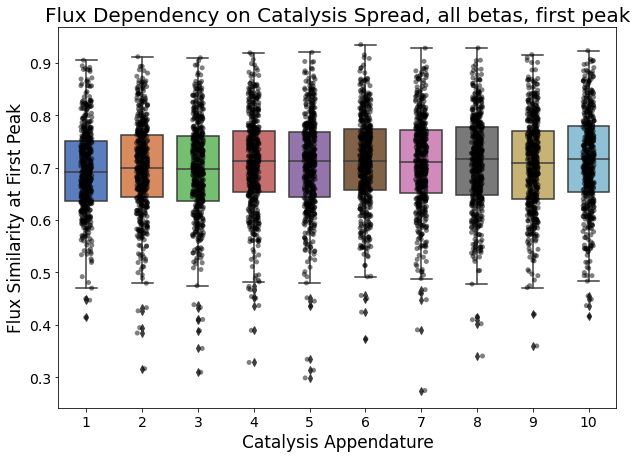

In [44]:
'''Iterate over every beta
Iterate over every init cond
find the first time the assembly reaches size of 100, and record the H in a list for specific beta.
Plot a boxplot with the points on it, different boxplot for every beta'''
coalescence_dict = {}
for catal in range(1,11):
    coalescence_dict[catal] = []
    for beta in range(len(list(eval('data_catal_' + str(catal))['beta_matrices_seeds'][0]))):
        for init_cond in range(eval('df_all_H_catal_' + str(catal) + '_beta_' + str(beta)).shape[0]):
            for step in range(eval('df_all_assembly_size_catal_' + str(catal) + '_beta_' + str(beta)).shape[1]):
                if int(eval('df_all_assembly_size_catal_' + str(catal) + '_beta_' + str(beta)).iloc[init_cond,step]) == 100:
                    first_peak_H = eval('df_all_H_catal_' + str(catal) + '_beta_' + str(beta)).iloc[init_cond,step]
                    coalescence_dict[catal].append(first_peak_H)
                    break
df_all_coalescence_data = pd.DataFrame(coalescence_dict)
#display(df_coalescence_results)
fig, ax = plt.subplots(figsize=(10, 7))
#df_coalescence_results.boxplot()
plot = sns.boxplot(data = df_all_coalescence_data,width=0.75, palette="muted")
plot.axes.set_title("Flux Dependency on Catalysis Spread, all betas, first peak",fontsize=20)
plot.set_xlabel("Catalysis Appendature",fontsize=17)
plot.tick_params(labelsize=14)
plot.set_ylabel("Flux Similarity at First Peak",fontsize=17)
# plot.xticks(['4','3','2','1'])
# plot.set(xticklabels=['4','3','2','1'])

bplot = sns.stripplot(data = df_all_coalescence_data, jitter=True, marker='o', alpha=0.5, color='black')

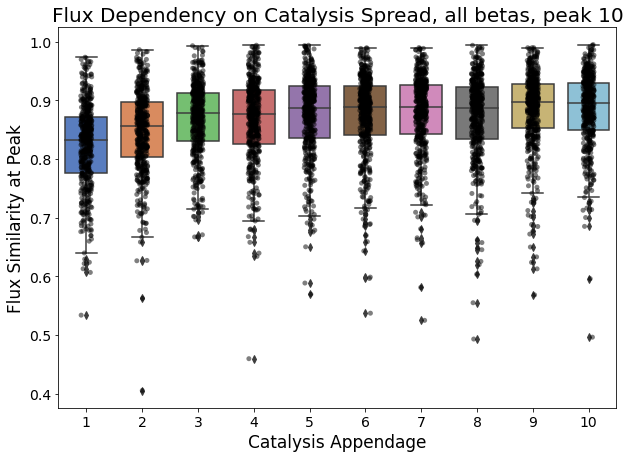

In [45]:
'''Iterate over every beta
Iterate over every init cond
find the last step, and record the H in a list for specific beta.
Plot a boxplot with the points on it, different boxplot for every beta'''
### Set peak to look at:
choose_peak = 10
coalescence_dict = {}
for catal in range(1,11):
    coalescence_dict[catal] = []
    for beta in range(len(list(eval('data_catal_' + str(catal))['beta_matrices_seeds'][0]))):
        for init_cond in range(eval('df_all_H_catal_' + str(catal) + '_beta_' + str(beta)).shape[0]):
            peak_counter = 0
            for step in range(eval('df_all_assembly_size_catal_' + str(catal) + '_beta_' + str(beta)).shape[1]):
                if str(eval('df_all_assembly_size_catal_' + str(catal) + '_beta_' + str(beta)).iloc[init_cond,step]) == 'nan':
                    break
                elif int(eval('df_all_assembly_size_catal_' + str(catal) + '_beta_' + str(beta)).iloc[init_cond,step]) == 100:
                    peak_counter += 1
                    if peak_counter == choose_peak:
                        last_peak_H = eval('df_all_H_catal_' + str(catal) + '_beta_' + str(beta)).iloc[init_cond,step]
                        coalescence_dict[catal].append(last_peak_H)
                        break
df_all_coalescence_data = pd.DataFrame(coalescence_dict)
#display(df_coalescence_results)
fig, ax = plt.subplots(figsize=(10, 7))
#df_coalescence_results.boxplot()
plot = sns.boxplot(data = df_all_coalescence_data,width=0.75, palette="muted")
plot.axes.set_title("Flux Dependency on Catalysis Spread, all betas, peak " + str(choose_peak), fontsize=20)
plot.set_xlabel("Catalysis Appendage",fontsize=17)
plot.tick_params(labelsize=14)
plot.set_ylabel("Flux Similarity at Peak",fontsize=17)
#plot.xticks(['4','3','2','1'])
#plot.set(xticklabels=['4','3','2','1'])

bplot = sns.stripplot(data = df_all_coalescence_data, jitter=True, marker='o', alpha=0.5, color='black')

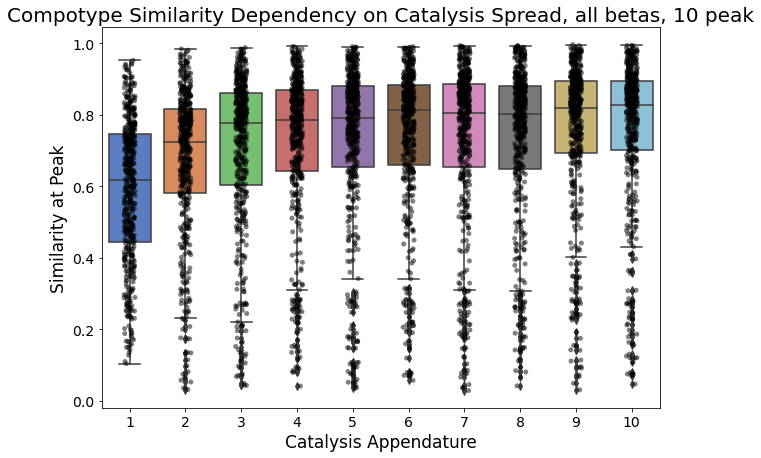

In [47]:
'''Iterate over every beta, Iterate over every init cond
find the first time the assembly reaches size of 100, and record the H in a list for specific beta.
Plot a boxplot with the points on it, different boxplot for every beta'''

'''This is true for each run's own compotype'''
### Set peak to look at:
choose_peak = 10
coalescence_dict = {}
for catal in range(1,11):
    coalescence_dict[catal] = []
    for beta in range(len(list(eval('data_catal_' + str(catal))['beta_matrices_seeds'][0]))):
        for init_cond in range(eval('df_all_H_compotype_catal_' + str(catal) + '_beta_' + str(beta)).shape[0]):
            peak_counter = 0
            for step in range(eval('df_all_assembly_size_catal_' + str(catal) + '_beta_' + str(beta)).shape[1]):
                if str(eval('df_all_assembly_size_catal_' + str(catal) + '_beta_' + str(beta)).iloc[init_cond,step]) == 'nan':
                    break
                elif int(eval('df_all_assembly_size_catal_' + str(catal) + '_beta_' + str(beta)).iloc[init_cond,step]) == 100:
                    peak_counter += 1
                    if peak_counter == choose_peak:
                        last_peak_H = eval('df_all_H_compotype_catal_' + str(catal) + '_beta_' + str(beta)).iloc[init_cond,step]
                        coalescence_dict[catal].append(last_peak_H)
                        break

df_all_coalescence_data = pd.DataFrame(coalescence_dict)
#display(df_coalescence_results)
fig, ax = plt.subplots(figsize=(10, 7))
#df_coalescence_results.boxplot()
plot = sns.boxplot(data = df_all_coalescence_data,width=0.75, palette="muted")
plot.axes.set_title("Compotype Similarity Dependency on Catalysis Spread, all betas, " + str(choose_peak) + " peak",fontsize=20)
plot.set_xlabel("Catalysis Appendature",fontsize=17)
plot.tick_params(labelsize=14)
plot.set_ylabel("Similarity at Peak",fontsize=17)
#plot.xticks(['4','3','2','1'])
# plot.set(xticklabels=['4','3','2','1'])

bplot = sns.stripplot(data = df_all_coalescence_data, jitter=True, marker='o', alpha=0.5, color='black')

Text(0, 0.5, 'Similarity at Peak')

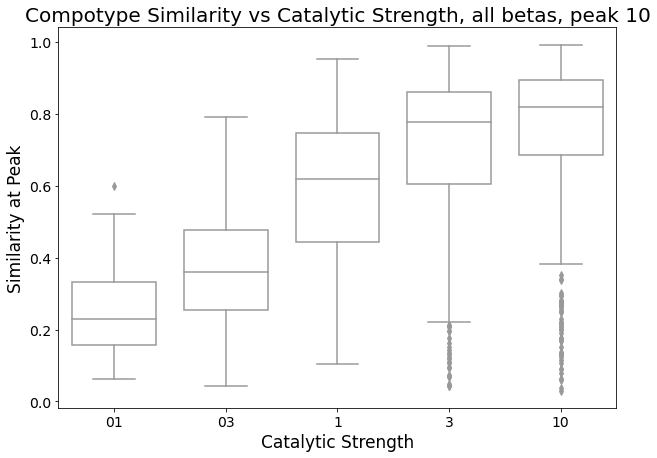

In [29]:
'''Iterate over every beta, Iterate over every init cond
find the first time the assembly reaches size of 100, and record the H in a list for specific beta.
Plot a boxplot with the points on it, different boxplot for every beta'''

'''This is true for The same compotype of catal_1'''
### Set peak to look at:
choose_peak = 10
coalescence_dict = {}
for catal in ['01','03',1,3,10]:
    coalescence_dict[catal] = []
    for beta in range(len(list(eval('data_catal_' + str(catal))['beta_matrices_seeds'][0]))):
        for init_cond in range(eval('df_all_H_compotype_catal_' + str(catal) + '_beta_' + str(beta) + '_global').shape[0]):
            peak_counter = 0
            for step in range(eval('df_all_assembly_size_catal_' + str(catal) + '_beta_' + str(beta)).shape[1]):
                if str(eval('df_all_assembly_size_catal_' + str(catal) + '_beta_' + str(beta)).iloc[init_cond,step]) == 'nan':
                    break
                elif int(eval('df_all_assembly_size_catal_' + str(catal) + '_beta_' + str(beta)).iloc[init_cond,step]) == 100:
                    peak_counter += 1
                    if peak_counter == choose_peak:
                        last_peak_H=eval('df_all_H_compotype_catal_'+str(catal)+'_beta_'+str(beta)+'_global').iloc[init_cond,step]
                        coalescence_dict[catal].append(last_peak_H)
                        #if catal == 1:
                            #print('Beta = ' + str(beta), 'Init. Cond. = ' + str(init_cond), 'Step = ' + str(step))
                        break

df_all_coalescence_data = pd.DataFrame(coalescence_dict)
#display(df_coalescence_results)
fig, ax = plt.subplots(figsize=(10, 7))
#df_coalescence_results.boxplot()
plot = sns.boxplot(data=df_all_coalescence_data,width=0.75, color='w')# palette="muted")
plot.axes.set_title("Compotype Similarity vs Catalytic Strength, all betas, peak " + str(choose_peak), fontsize=20)
plot.set_xlabel("Catalytic Strength",fontsize=17)
plot.tick_params(labelsize=14)
plot.set_ylabel("Similarity at Peak",fontsize=17)
#plot.xticks(['4','3','2','1'])
# plot.set(xticklabels=['4','3','2','1'])

# bplot = sns.stripplot(data = df_all_coalescence_data, jitter=True, marker='o', alpha=0.5, color='black')

([<matplotlib.axis.XTick at 0x1cd91cc5040>,
 [Text(1, 0, '01'),
  Text(2, 0, '03'),
  Text(3, 0, '1'),
  Text(4, 0, '3'),
  Text(5, 0, '10')])

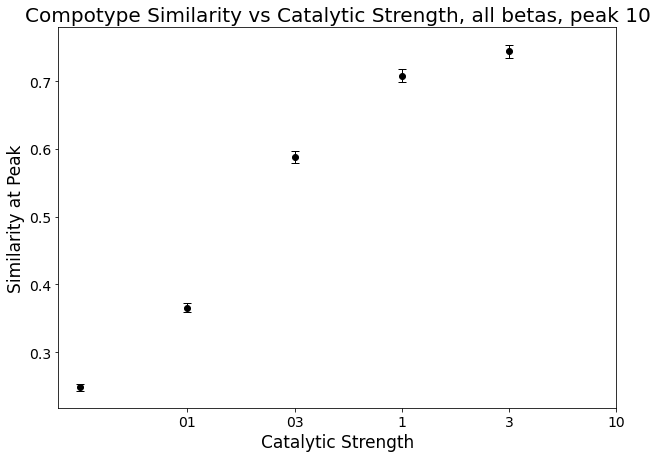

In [48]:

catals = ['01','03',1,3,10]
choose_peak = 10
coalescence_dict = {}
for catal in ['01','03',1,3,10]:
    coalescence_dict[catal] = []
    for beta in range(len(list(eval('data_catal_' + str(catal))['beta_matrices_seeds'][0]))):
        for init_cond in range(eval('df_all_H_compotype_catal_' + str(catal) + '_beta_' + str(beta) + '_global').shape[0]):
            peak_counter = 0
            for step in range(eval('df_all_assembly_size_catal_' + str(catal) + '_beta_' + str(beta)).shape[1]):
                if str(eval('df_all_assembly_size_catal_' + str(catal) + '_beta_' + str(beta)).iloc[init_cond,step]) == 'nan':
                    break
                elif int(eval('df_all_assembly_size_catal_' + str(catal) + '_beta_' + str(beta)).iloc[init_cond,step]) == 100:
                    peak_counter += 1
                    if peak_counter == choose_peak:
                        last_peak_H=eval('df_all_H_compotype_catal_'+str(catal)+'_beta_'+str(beta)+'_global').iloc[init_cond,step]
                        coalescence_dict[catal].append(last_peak_H)
                        #if catal == 1:
                            #print('Beta = ' + str(beta), 'Init. Cond. = ' + str(init_cond), 'Step = ' + str(step))
                        break

df_all_coalescence_data = pd.DataFrame(coalescence_dict)
#display(df_coalescence_results)
fig, ax = plt.subplots(figsize=(10, 7))
positions = []
pos = 0
for column in range(df_all_coalescence_data.shape[1]):
    vector = list(df_all_coalescence_data.iloc[:,column])
    mean_column = np.mean(vector)
    sem = stats.sem(vector)
    plot = plt.errorbar(pos,mean_column,yerr=sem,fmt = 'o',color='k',linewidth = 1,capsize = 4, ecolor='k')
    pos+=1
    positions.append(pos)


# plot = sns.boxplot(data=df_all_coalescence_data,width=0.75, color='w')
plt.title("Compotype Similarity vs Catalytic Strength, all betas, peak " + str(choose_peak), fontsize=20)
plt.xlabel("Catalytic Strength",fontsize=17)
plt.tick_params(labelsize=14)
plt.ylabel("Similarity at Peak",fontsize=17)
plt.xticks(positions,labels=catals)

In [31]:
df_all_coalescence_data

,01,03,1,3,10
0,0.450236,0.673160,0.816774,0.268596,0.972566
1,0.443831,0.296707,0.266461,0.124222,0.133304
2,0.460111,0.292411,0.661180,0.790312,0.198403
3,0.145267,0.562335,0.800349,0.043368,0.302722
4,0.324552,0.440829,0.417261,0.897423,0.978292
...,...,...,...,...,...
495,0.073076,0.348453,0.574008,0.926593,0.797052
496,0.137162,0.261222,0.420982,0.805637,0.981320
497,0.064357,0.167786,0.668171,0.110879,0.897377
498,0.110659,0.208784,0.550821,0.768361,0.910626


In [32]:
# Data for Perturbations from Compotype analysis
series1 = df_all_coalescence_data.loc[0:29,1]
print(series1.idxmax())
series2 = df_all_coalescence_data.loc[30:59,1]
print(series2.idxmax())
series3 = df_all_coalescence_data.loc[60:89,1]
print(series3.idxmax())
series4 = df_all_coalescence_data.loc[90:119,1]
print(series4.idxmax())
series5 = df_all_coalescence_data.loc[120:149,1]
print(series5.idxmax())

7
48
64
90
136


In [33]:
# Data for Perturbations from Compotype analysis
df_temp = pd.DataFrame(data_catal_1['compositions'][0][11].T)
output1 = df_temp.iloc[272]
print(output1.sum())
df_temp = pd.DataFrame(data_catal_1['compositions'][1][24].T)
output2 = df_temp.iloc[272]
print(output2.sum())
df_temp = pd.DataFrame(data_catal_1['compositions'][2][28].T)
output3 = df_temp.iloc[272]
print(output3.sum())
df_temp = pd.DataFrame(data_catal_1['compositions'][3][0].T)
output4 = df_temp.iloc[276]
print(output4.sum())
df_temp = pd.DataFrame(data_catal_1['compositions'][4][1].T)
output5 = df_temp.iloc[282]
print(output5.sum())
df_temp_full = pd.DataFrame([output1, output2, output3, output4, output5]).T
df_temp_full.columns = [0,1,2,3,4]
#df_temp_full.to_csv('C:\\Users\\amitka\\Box Sync\\B-OOLf\\Pap425 Messy GARD emergence\\GARD Simulation Project AK\\High_H_to_Compotypes_14Sep20.csv',
#                   index = False, header = False)

100.0
51.0
51.0
55.0
59.0


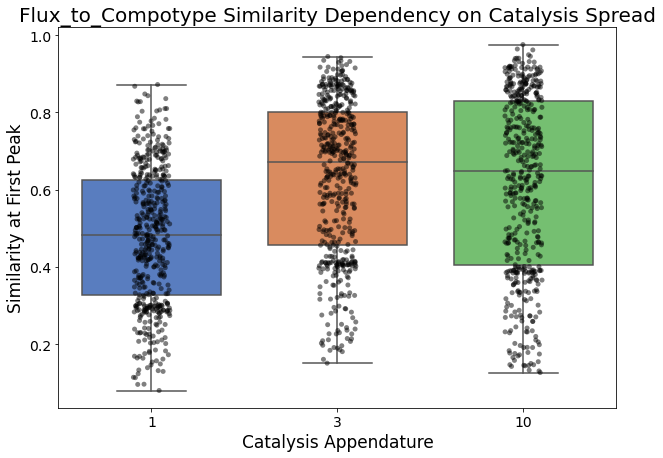

In [34]:
'''Iterate over every beta, Iterate over every init cond
find the first time the assembly reaches size of 100, and record the H in a list for specific beta.
Plot a boxplot with the points on it, different boxplot for every beta'''

'''This is true for each run's own compotype'''
coalescence_dict = {}
for catal in [1,3,10]:
    coalescence_dict[catal] = []
    for beta in range(len(list(eval('data_catal_' + str(catal))['beta_matrices_seeds'][0]))):
        for init_cond in range(eval('df_all_H_compotype_catal_' + str(catal) + '_beta_' + str(beta)).shape[0]):
            for step in range(eval('df_all_assembly_size_catal_' + str(catal) + '_beta_' + str(beta)).shape[1]):
                if int(eval('df_all_assembly_size_catal_' + str(catal) + '_beta_' + str(beta)).iloc[init_cond,step]) == 100:
                    first_peak_H = eval('df_all_H_flux_to_compotype_catal_' + str(catal) + '_beta_' + str(beta)).iloc[init_cond,step]
                    coalescence_dict[catal].append(first_peak_H)
                    break
df_all_coalescence_data = pd.DataFrame(coalescence_dict)
#display(df_coalescence_results)
fig, ax = plt.subplots(figsize=(10, 7))
#df_coalescence_results.boxplot()
plot = sns.boxplot(data = df_all_coalescence_data,width=0.75, palette="muted")
plot.axes.set_title("Flux_to_Compotype Similarity Dependency on Catalysis Spread",fontsize=20)
plot.set_xlabel("Catalysis Appendature",fontsize=17)
plot.tick_params(labelsize=14)
plot.set_ylabel("Similarity at First Peak",fontsize=17)
#plot.xticks(['4','3','2','1'])
# plot.set(xticklabels=['4','3','2','1'])

bplot = sns.stripplot(data = df_all_coalescence_data, jitter=True, marker='o', alpha=0.5, color='black')

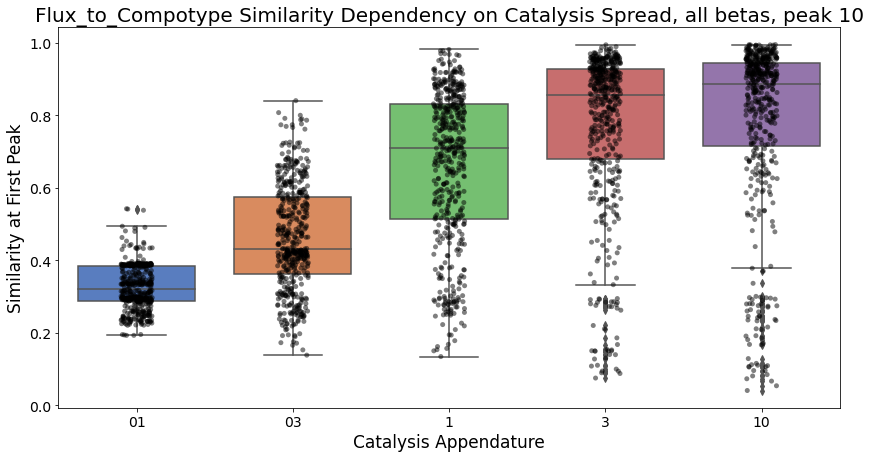

In [35]:
'''Iterate over every beta, Iterate over every init cond
find the first time the assembly reaches size of 100, and record the H in a list for specific beta.
Plot a boxplot with the points on it, different boxplot for every beta'''

'''This is true for The same compotype of catal_1'''
### Set peak to look at:
choose_peak = 10
coalescence_dict = {}
for catal in ['01','03',1,3,10]:
    coalescence_dict[catal] = []
    for beta in range(len(list(eval('data_catal_' + str(catal))['beta_matrices_seeds'][0]))):
        for init_cond in range(eval('df_all_H_compotype_catal_' + str(catal) + '_beta_' + str(beta) + '_global').shape[0]):
            peak_counter = 0
            for step in range(eval('df_all_assembly_size_catal_' + str(catal) + '_beta_' + str(beta)).shape[1]):
                if str(eval('df_all_assembly_size_catal_' + str(catal) + '_beta_' + str(beta)).iloc[init_cond,step]) == 'nan':
                    break
                elif int(eval('df_all_assembly_size_catal_' + str(catal) + '_beta_' + str(beta)).iloc[init_cond,step]) == 100:
                    peak_counter += 1
                    if peak_counter == choose_peak:
                        last_peak_H=eval('df_all_H_flux_to_compotype_catal_'+str(catal)+'_beta_'+str(beta)+'_global').iloc[init_cond,step]
                        coalescence_dict[catal].append(last_peak_H)
                        break
                        
df_all_coalescence_data = pd.DataFrame(coalescence_dict)
#display(df_coalescence_results)
fig, ax = plt.subplots(figsize=(14, 7))
#df_coalescence_results.boxplot()
plot = sns.boxplot(data = df_all_coalescence_data,width=0.75, palette="muted")
plot.axes.set_title("Flux_to_Compotype Similarity Dependency on Catalysis Spread, all betas, peak " + str(choose_peak),fontsize=20)
plot.set_xlabel("Catalysis Appendature",fontsize=17)
plot.tick_params(labelsize=14)
plot.set_ylabel("Similarity at First Peak",fontsize=17)
#plot.xticks(['4','3','2','1'])
# plot.set(xticklabels=['4','3','2','1'])

bplot = sns.stripplot(data = df_all_coalescence_data, jitter=True, marker='o', alpha=0.5, color='black')

1
2
3
4
5
6


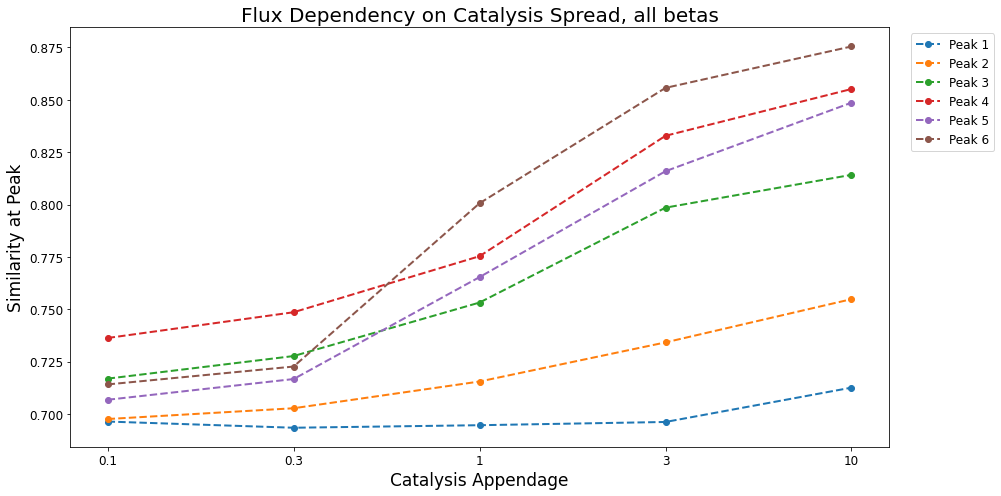

In [36]:
'''Flux analysis final graph'''
'''Graph for all curves of a kind together.
Let's do a loop for all the calculations done for one graph and record the averages for each series.
This dictionary record we can plot by going over each appendage independently and coupling it to the appendages values.'''
max_peak = 6
the_big_coalescence_dict = {}
catalysis_list = [0.1,0.3,1,3,10]
positions_list = range(1,len(catalysis_list)+1)
for peak in range(1,max_peak+1):
    coalescence_dict = {}
    for catal in ['01','03',1,3,10]:
        coalescence_dict[catal] = []
        for beta in range(len(list(eval('data_catal_' + str(catal))['beta_matrices_seeds'][0]))):
            for init_cond in range(eval('df_all_H_catal_' + str(catal) + '_beta_' + str(beta)).shape[0]):
                peak_counter = 0
                for step in range(eval('df_all_assembly_size_catal_' + str(catal) + '_beta_' + str(beta)).shape[1]):
                    if str(eval('df_all_assembly_size_catal_' + str(catal) + '_beta_' + str(beta)).iloc[init_cond,step]) == 'nan':
                        break
                    elif int(eval('df_all_assembly_size_catal_' + str(catal) + '_beta_' + str(beta)).iloc[init_cond,step]) == 100:
                        peak_counter += 1
                        if peak_counter == peak:
                            last_peak_H = eval('df_all_H_catal_' + str(catal) + '_beta_' + str(beta)).iloc[init_cond,step]
                            coalescence_dict[catal].append(last_peak_H)
                            break
    df_all_coalescence_data = pd.DataFrame(coalescence_dict)
    the_big_coalescence_dict[peak] = list(df_all_coalescence_data.mean(0))
    print(peak)

fig, ax = plt.subplots(figsize=(14, 7))
for peak in the_big_coalescence_dict:
    ax.plot(positions_list,the_big_coalescence_dict[peak], linestyle='--', marker='o', label='Peak ' + str(peak), linewidth=2.0)
ax.legend(bbox_to_anchor=(1.02, 1.0), loc='upper left', fontsize=12)
plt.title('Flux Dependency on Catalysis Spread, all betas', fontsize=20)
plt.xlabel('Catalysis Appendage', fontsize=17)
plt.ylabel('Similarity at Peak', fontsize=17)
plt.xticks(positions_list,catalysis_list)
plt.tick_params(labelsize=12)
plt.tight_layout()

1
2
3
4
5
6


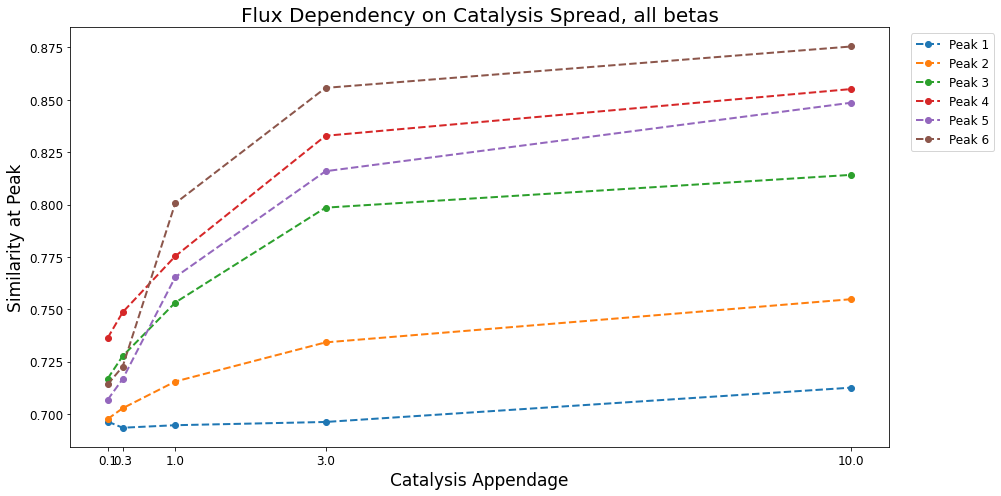

In [37]:
'''Flux analysis final graph'''
'''Graph for all curves of a kind together.
Let's do a loop for all the calculations done for one graph and record the averages for each series.
This dictionary record we can plot by going over each appendage independently and coupling it to the appendages values.'''
max_peak = 6
the_big_coalescence_dict = {}
catalysis_list = [0.1,0.3,1,3,10]
positions_list = range(1,len(catalysis_list)+1)
for peak in range(1,max_peak+1):
    coalescence_dict = {}
    for catal in ['01','03',1,3,10]:
        coalescence_dict[catal] = []
        for beta in range(len(list(eval('data_catal_' + str(catal))['beta_matrices_seeds'][0]))):
            for init_cond in range(eval('df_all_H_catal_' + str(catal) + '_beta_' + str(beta)).shape[0]):
                peak_counter = 0
                for step in range(eval('df_all_assembly_size_catal_' + str(catal) + '_beta_' + str(beta)).shape[1]):
                    if str(eval('df_all_assembly_size_catal_' + str(catal) + '_beta_' + str(beta)).iloc[init_cond,step]) == 'nan':
                        break
                    elif int(eval('df_all_assembly_size_catal_' + str(catal) + '_beta_' + str(beta)).iloc[init_cond,step]) == 100:
                        peak_counter += 1
                        if peak_counter == peak:
                            last_peak_H = eval('df_all_H_catal_' + str(catal) + '_beta_' + str(beta)).iloc[init_cond,step]
                            coalescence_dict[catal].append(last_peak_H)
                            break
    df_all_coalescence_data = pd.DataFrame(coalescence_dict)
    the_big_coalescence_dict[peak] = list(df_all_coalescence_data.mean(0))
    print(peak)

fig, ax = plt.subplots(figsize=(14, 7))
for peak in the_big_coalescence_dict:
    ax.plot(catalysis_list,the_big_coalescence_dict[peak], linestyle='--', marker='o', label='Peak ' + str(peak), linewidth=2.0)
ax.legend(bbox_to_anchor=(1.02, 1.0), loc='upper left', fontsize=12)
plt.title('Flux Dependency on Catalysis Spread, all betas', fontsize=20)
plt.xlabel('Catalysis Appendage',fontsize=17)
plt.ylabel('Similarity at Peak',fontsize=17)
plt.xticks(catalysis_list)
plt.tick_params(labelsize=12)
plt.tight_layout()

1
2
3
4
5
6


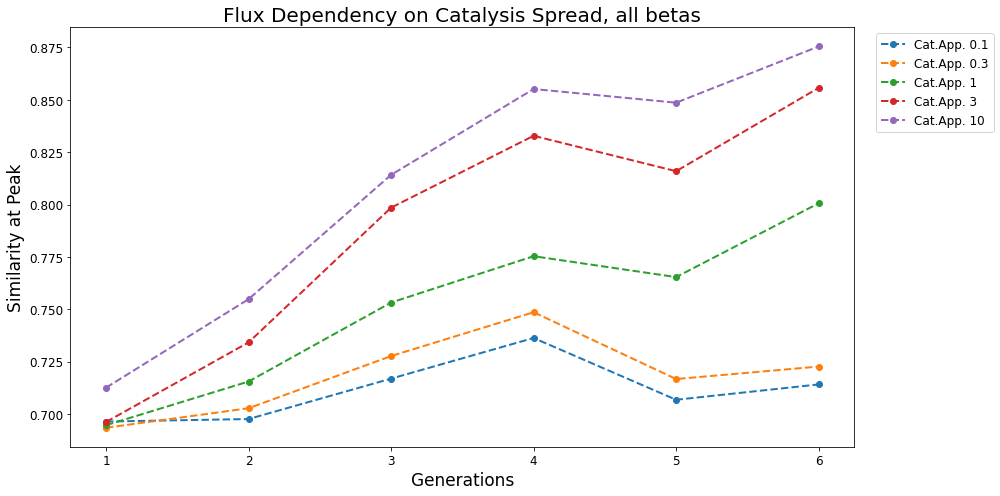

In [38]:
'''Flux analysis final graph'''
'''Graph for all curves of a kind together.
Let's do a loop for all the calculations done for one graph and record the averages for each series.
This dictionary record we can plot by going over each appendage independently and coupling it to the appendages values.'''
max_peak = 6
the_big_coalescence_dict = {}
catalysis_list = [0.1,0.3,1,3,10]
positions_list = range(1,len(catalysis_list)+1)
for peak in range(1,max_peak+1):
    coalescence_dict = {}
    for catal in ['01','03',1,3,10]:
        coalescence_dict[catal] = []
        for beta in range(len(list(eval('data_catal_' + str(catal))['beta_matrices_seeds'][0]))):
            for init_cond in range(eval('df_all_H_catal_' + str(catal) + '_beta_' + str(beta)).shape[0]):
                peak_counter = 0
                for step in range(eval('df_all_assembly_size_catal_' + str(catal) + '_beta_' + str(beta)).shape[1]):
                    if str(eval('df_all_assembly_size_catal_' + str(catal) + '_beta_' + str(beta)).iloc[init_cond,step]) == 'nan':
                        break
                    elif int(eval('df_all_assembly_size_catal_' + str(catal) + '_beta_' + str(beta)).iloc[init_cond,step]) == 100:
                        peak_counter += 1
                        if peak_counter == peak:
                            last_peak_H = eval('df_all_H_catal_' + str(catal) + '_beta_' + str(beta)).iloc[init_cond,step]
                            coalescence_dict[catal].append(last_peak_H)
                            break
    df_all_coalescence_data = pd.DataFrame(coalescence_dict)
    the_big_coalescence_dict[peak] = list(df_all_coalescence_data.mean(0))
    print(peak)

df_the_big_coalescence_dict = pd.DataFrame(the_big_coalescence_dict)

fig, ax = plt.subplots(figsize=(14, 7))
for catal in range(df_the_big_coalescence_dict.shape[0]):
    ax.plot(range(1,max_peak+1),df_the_big_coalescence_dict.iloc[catal,:max_peak], linestyle='--', marker='o', label='Cat.App. ' + str(catalysis_list[catal]), linewidth=2.0)
ax.legend(bbox_to_anchor=(1.02, 1.0), loc='upper left', fontsize=12)
plt.title('Flux Dependency on Catalysis Spread, all betas', fontsize=20)
plt.xlabel('Generations', fontsize=17)
plt.ylabel('Similarity at Peak', fontsize=17)
plt.xticks(range(1,max_peak+1))
plt.tick_params(labelsize=12)
plt.tight_layout()

1
2
3
4
5
6


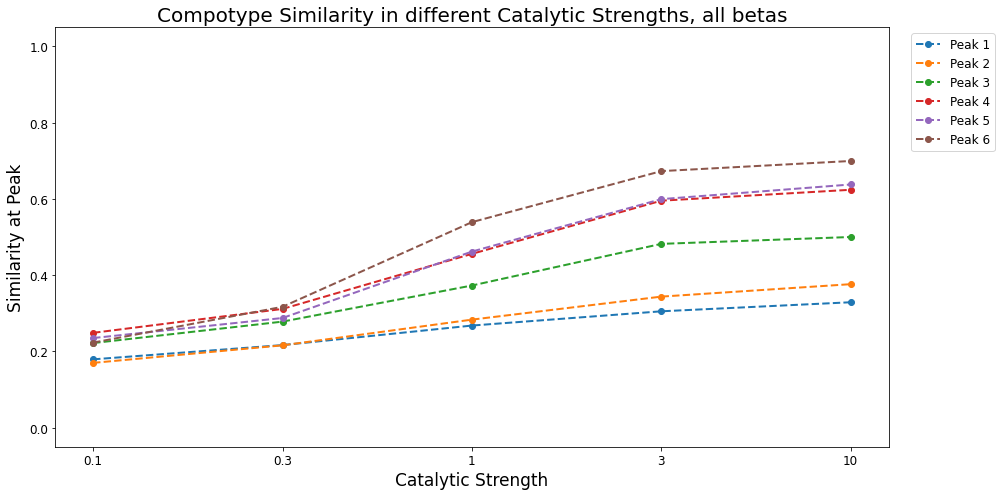

In [39]:
'''Compotype analysis final graph'''
'''Graph for all curves of a kind together.
Let's do a loop for all the calculations done for one graph and record the averages for each series.
This dictionary record we can plot by going over each appendage independently and coupling it to the appendages values.'''
max_peak = 6
the_big_coalescence_dict = {}
catalysis_list = [0.1,0.3,1,3,10]
positions_list = range(1,len(catalysis_list)+1)
for peak in range(1,max_peak+1):
    coalescence_dict = {}
    for catal in ['01','03',1,3,10]:
        coalescence_dict[catal] = []
        for beta in range(len(list(eval('data_catal_' + str(catal))['beta_matrices_seeds'][0]))):
            for init_cond in range(eval('df_all_H_compotype_catal_' + str(catal) + '_beta_' + str(beta) + '_global').shape[0]):
                peak_counter = 0
                for step in range(eval('df_all_assembly_size_catal_' + str(catal) + '_beta_' + str(beta)).shape[1]):
                    if str(eval('df_all_assembly_size_catal_' + str(catal) + '_beta_' + str(beta)).iloc[init_cond,step]) == 'nan':
                        break
                    elif int(eval('df_all_assembly_size_catal_' + str(catal) + '_beta_' + str(beta)).iloc[init_cond,step]) == 100:
                        peak_counter += 1
                        if peak_counter == peak:
                            last_peak_H=eval('df_all_H_compotype_catal_'+str(catal)+'_beta_'+str(beta)+'_global').iloc[init_cond,step]
                            coalescence_dict[catal].append(last_peak_H)
                            break
    df_all_coalescence_data = pd.DataFrame(coalescence_dict)
    the_big_coalescence_dict[peak] = list(df_all_coalescence_data.mean(0))
    print(peak)

fig, ax = plt.subplots(figsize=(14, 7))
for peak in the_big_coalescence_dict:
    ax.plot(positions_list,the_big_coalescence_dict[peak], linestyle='--', marker='o', label='Peak ' + str(peak), linewidth=2.0)
ax.legend(bbox_to_anchor=(1.02, 1.0), loc='upper left', fontsize=12)
plt.title('Compotype Similarity in different Catalytic Strengths, all betas', fontsize=20)
plt.xlabel('Catalytic Strength', fontsize=17)
plt.ylabel('Similarity at Peak', fontsize=17)
plt.xticks(positions_list,catalysis_list)
plt.tick_params(labelsize=12)
plt.ylim(-0.05,1.05)
plt.tight_layout()

1
2
3
4
5
6


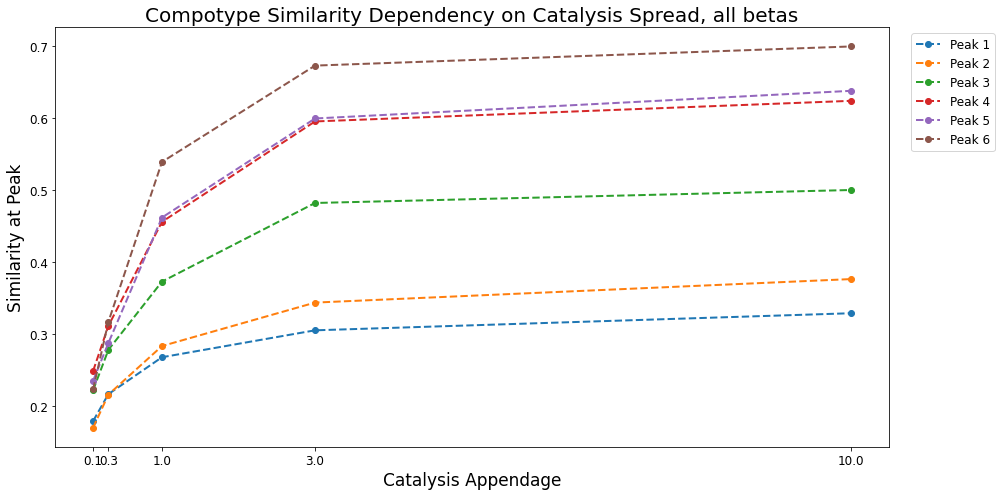

In [40]:
'''Compotype analysis final graph'''
'''Graph for all curves of a kind together.
Let's do a loop for all the calculations done for one graph and record the averages for each series.
This dictionary record we can plot by going over each appendage independently and coupling it to the appendages values.'''
max_peak = 6
the_big_coalescence_dict = {}
catalysis_list = [0.1,0.3,1,3,10]
positions_list = range(1,len(catalysis_list)+1)
for peak in range(1,max_peak+1):
    coalescence_dict = {}
    for catal in ['01','03',1,3,10]:
        coalescence_dict[catal] = []
        for beta in range(len(list(eval('data_catal_' + str(catal))['beta_matrices_seeds'][0]))):
            for init_cond in range(eval('df_all_H_compotype_catal_' + str(catal) + '_beta_' + str(beta) + '_global').shape[0]):
                peak_counter = 0
                for step in range(eval('df_all_assembly_size_catal_' + str(catal) + '_beta_' + str(beta)).shape[1]):
                    if str(eval('df_all_assembly_size_catal_' + str(catal) + '_beta_' + str(beta)).iloc[init_cond,step]) == 'nan':
                        break
                    elif int(eval('df_all_assembly_size_catal_' + str(catal) + '_beta_' + str(beta)).iloc[init_cond,step]) == 100:
                        peak_counter += 1
                        if peak_counter == peak:
                            last_peak_H=eval('df_all_H_compotype_catal_'+str(catal)+'_beta_'+str(beta)+'_global').iloc[init_cond,step]
                            coalescence_dict[catal].append(last_peak_H)
                            break
    df_all_coalescence_data = pd.DataFrame(coalescence_dict)
    the_big_coalescence_dict[peak] = list(df_all_coalescence_data.mean(0))
    print(peak)

fig, ax = plt.subplots(figsize=(14, 7))
for peak in the_big_coalescence_dict:
    ax.plot(catalysis_list,the_big_coalescence_dict[peak], linestyle='--', marker='o', label='Peak ' + str(peak), linewidth=2.0)
ax.legend(bbox_to_anchor=(1.02, 1.0), loc='upper left', fontsize=12)
plt.title('Compotype Similarity Dependency on Catalysis Spread, all betas', fontsize=20)
plt.xlabel('Catalysis Appendage', fontsize=17)
plt.ylabel('Similarity at Peak', fontsize=17)
plt.xticks(catalysis_list)
plt.tick_params(labelsize=12)
plt.tight_layout()

1
2
3
4
5
6


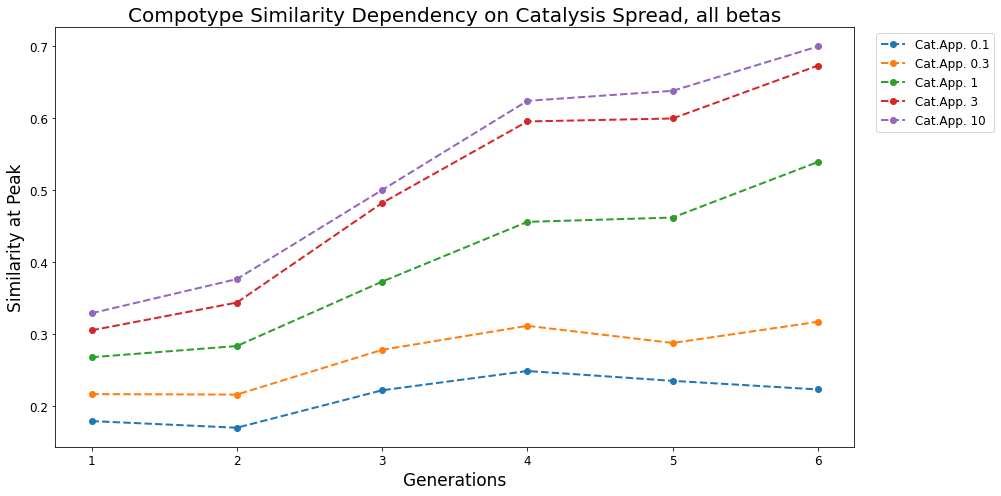

In [41]:
'''Compotype analysis final graph'''
'''Graph for all curves of a kind together.
Let's do a loop for all the calculations done for one graph and record the averages for each series.
This dictionary record we can plot by going over each appendage independently and coupling it to the appendages values.'''
max_peak = 6
the_big_coalescence_dict = {}
catalysis_list = [0.1,0.3,1,3,10]
positions_list = range(1,len(catalysis_list)+1)
for peak in range(1,max_peak+1):
    coalescence_dict = {}
    for catal in ['01','03',1,3,10]:
        coalescence_dict[catal] = []
        for beta in range(len(list(eval('data_catal_' + str(catal))['beta_matrices_seeds'][0]))):
            for init_cond in range(eval('df_all_H_compotype_catal_' + str(catal) + '_beta_' + str(beta) + '_global').shape[0]):
                peak_counter = 0
                for step in range(eval('df_all_assembly_size_catal_' + str(catal) + '_beta_' + str(beta)).shape[1]):
                    if str(eval('df_all_assembly_size_catal_' + str(catal) + '_beta_' + str(beta)).iloc[init_cond,step]) == 'nan':
                        break
                    elif int(eval('df_all_assembly_size_catal_' + str(catal) + '_beta_' + str(beta)).iloc[init_cond,step]) == 100:
                        peak_counter += 1
                        if peak_counter == peak:
                            last_peak_H=eval('df_all_H_compotype_catal_'+str(catal)+'_beta_'+str(beta)+'_global').iloc[init_cond,step]
                            coalescence_dict[catal].append(last_peak_H)
                            break
    df_all_coalescence_data = pd.DataFrame(coalescence_dict)
    the_big_coalescence_dict[peak] = list(df_all_coalescence_data.mean(0))
    print(peak)

df_the_big_coalescence_dict = pd.DataFrame(the_big_coalescence_dict)
fig, ax = plt.subplots(figsize=(14, 7))
for catal in range(df_the_big_coalescence_dict.shape[0]):
    ax.plot(range(1,max_peak+1),df_the_big_coalescence_dict.iloc[catal,:max_peak], linestyle='--', marker='o', label='Cat.App. ' + str(catalysis_list[catal]), linewidth=2.0)
ax.legend(bbox_to_anchor=(1.02, 1.0), loc='upper left', fontsize=12)
plt.title('Compotype Similarity Dependency on Catalysis Spread, all betas', fontsize=20)
plt.xlabel('Generations', fontsize=17)
plt.ylabel('Similarity at Peak', fontsize=17)
plt.xticks(range(1,max_peak+1))
plt.tick_params(labelsize=12)
plt.tight_layout()

In [42]:
df_the_big_coalescence_dict

,1,2,3,4,5,6
0,0.179351,0.170088,0.222087,0.248878,0.235228,0.223248
1,0.216791,0.216122,0.278312,0.311618,0.287813,0.317212
2,0.267999,0.283546,0.373030,0.456042,0.462026,0.539223
3,0.305393,0.343907,0.482251,0.595504,0.599595,0.673068
4,0.329111,0.376535,0.500259,0.624116,0.638013,0.699639


1
2
3
4
5
6


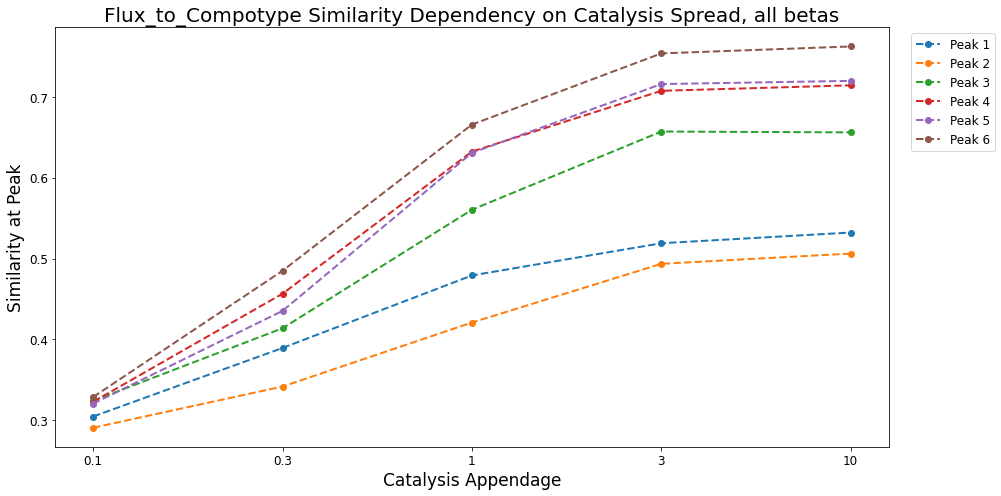

In [43]:
'''Compotype analysis final graph'''
'''Graph for all curves of a kind together.
Let's do a loop for all the calculations done for one graph and record the averages for each series.
This dictionary record we can plot by going over each appendage independently and coupling it to the appendages values.'''
max_peak = 6
the_big_coalescence_dict = {}
catalysis_list = [0.1,0.3,1,3,10]
positions_list = range(1,len(catalysis_list)+1)
for peak in range(1,max_peak+1):
    coalescence_dict = {}
    for catal in ['01','03',1,3,10]:
        coalescence_dict[catal] = []
        for beta in range(len(list(eval('data_catal_' + str(catal))['beta_matrices_seeds'][0]))):
            for init_cond in range(eval('df_all_H_compotype_catal_' + str(catal) + '_beta_' + str(beta) + '_global').shape[0]):
                peak_counter = 0
                for step in range(eval('df_all_assembly_size_catal_' + str(catal) + '_beta_' + str(beta)).shape[1]):
                    if str(eval('df_all_assembly_size_catal_' + str(catal) + '_beta_' + str(beta)).iloc[init_cond,step]) == 'nan':
                        break
                    elif int(eval('df_all_assembly_size_catal_' + str(catal) + '_beta_' + str(beta)).iloc[init_cond,step]) == 100:
                        peak_counter += 1
                        if peak_counter == peak:
                            last_peak_H=eval('df_all_H_flux_to_compotype_catal_'+str(catal)+'_beta_'+str(beta)+'_global').iloc[init_cond,step]
                            coalescence_dict[catal].append(last_peak_H)
                            break
    df_all_coalescence_data = pd.DataFrame(coalescence_dict)
    the_big_coalescence_dict[peak] = list(df_all_coalescence_data.mean(0))
    print(peak)

fig, ax = plt.subplots(figsize=(14, 7))
for peak in the_big_coalescence_dict:
    ax.plot(positions_list,the_big_coalescence_dict[peak], linestyle='--', marker='o', label='Peak ' + str(peak), linewidth=2.0)
ax.legend(bbox_to_anchor=(1.02, 1.0), loc='upper left', fontsize=12)
plt.title('Flux_to_Compotype Similarity Dependency on Catalysis Spread, all betas', fontsize=20)
plt.xlabel('Catalysis Appendage', fontsize=17)
plt.ylabel('Similarity at Peak', fontsize=17)
plt.xticks(positions_list,catalysis_list)
plt.tick_params(labelsize=12)
plt.tight_layout()

1
2
3
4
5
6


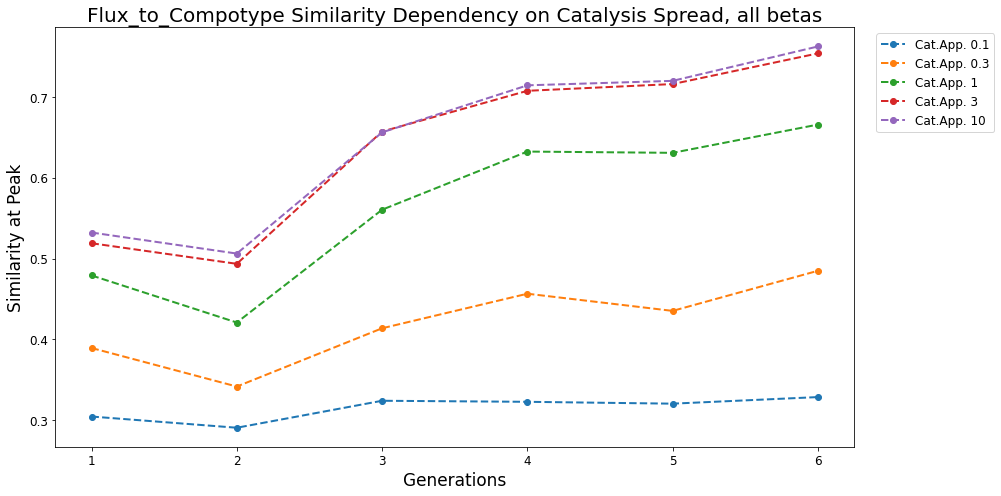

In [44]:
'''Compotype analysis final graph'''
'''Graph for all curves of a kind together.
Let's do a loop for all the calculations done for one graph and record the averages for each series.
This dictionary record we can plot by going over each appendage independently and coupling it to the appendages values.'''
max_peak = 6
the_big_coalescence_dict = {}
catalysis_list = [0.1,0.3,1,3,10]
positions_list = range(1,len(catalysis_list)+1)
for peak in range(1,max_peak+1):
    coalescence_dict = {}
    for catal in ['01','03',1,3,10]:
        coalescence_dict[catal] = []
        for beta in range(len(list(eval('data_catal_' + str(catal))['beta_matrices_seeds'][0]))):
            for init_cond in range(eval('df_all_H_compotype_catal_' + str(catal) + '_beta_' + str(beta) + '_global').shape[0]):
                peak_counter = 0
                for step in range(eval('df_all_assembly_size_catal_' + str(catal) + '_beta_' + str(beta)).shape[1]):
                    if str(eval('df_all_assembly_size_catal_' + str(catal) + '_beta_' + str(beta)).iloc[init_cond,step]) == 'nan':
                        break
                    elif int(eval('df_all_assembly_size_catal_' + str(catal) + '_beta_' + str(beta)).iloc[init_cond,step]) == 100:
                        peak_counter += 1
                        if peak_counter == peak:
                            last_peak_H=eval('df_all_H_flux_to_compotype_catal_'+str(catal)+'_beta_'+str(beta)+'_global').iloc[init_cond,step]
                            coalescence_dict[catal].append(last_peak_H)
                            break
    df_all_coalescence_data = pd.DataFrame(coalescence_dict)
    the_big_coalescence_dict[peak] = list(df_all_coalescence_data.mean(0))
    print(peak)

df_the_big_coalescence_dict = pd.DataFrame(the_big_coalescence_dict)
fig, ax = plt.subplots(figsize=(14, 7))
for catal in range(df_the_big_coalescence_dict.shape[0]):
    ax.plot(range(1,max_peak+1),df_the_big_coalescence_dict.iloc[catal,:max_peak], linestyle='--', marker='o', label='Cat.App. ' + str(catalysis_list[catal]), linewidth=2.0)
ax.legend(bbox_to_anchor=(1.02, 1.0), loc='upper left', fontsize=12)
plt.title('Flux_to_Compotype Similarity Dependency on Catalysis Spread, all betas', fontsize=20)
plt.xlabel('Generations', fontsize=17)
plt.ylabel('Similarity at Peak', fontsize=17)
plt.xticks(range(1,max_peak+1))
plt.tick_params(labelsize=12)
plt.tight_layout()

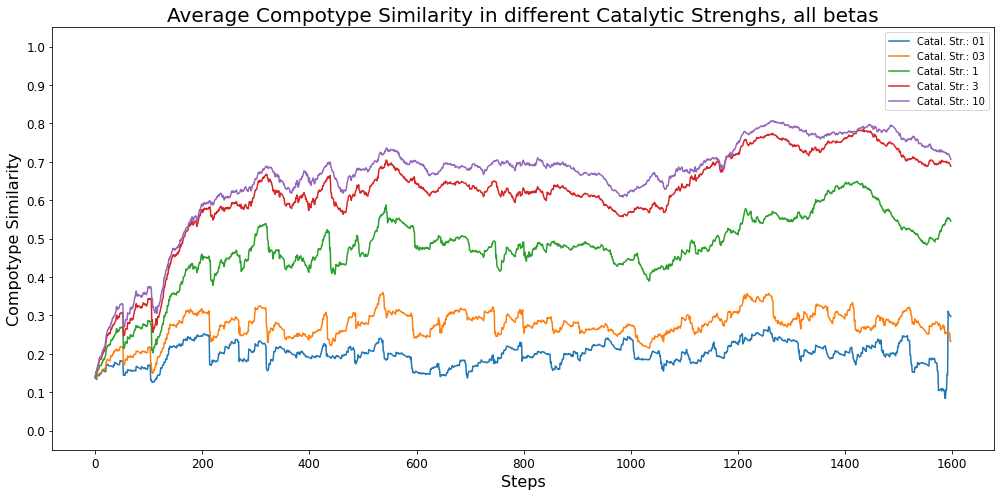

In [45]:
'''Compotype analysis final graph'''
'''Graph for all curves of a kind together.
Let's do a loop for all the calculations done for one graph and record the averages for each series.
This dictionary record we can plot by going over each appendage independently and coupling it to the appendages values.'''
the_big_coalescence_dict = {}
catalysis_list = [0.1,0.3,1,3,10]
positions_list = range(1,len(catalysis_list)+1)


all_data_analyses_dict = {}
for catal in ['01','03',1,3,10]:
    data_analysis_dict = {}
    for beta in range(len(list(eval('data_catal_' + str(catal))['beta_matrices_seeds'][0]))):
        for init_cond in range(eval('df_all_H_compotype_catal_' + str(catal) + '_beta_' + str(beta) + '_global').shape[0]):
            trajectory = list(eval('df_all_H_compotype_catal_' + str(catal) + '_beta_' + str(beta) + '_global').iloc[init_cond,:])
            for step_idx, step in enumerate(trajectory):
                if str(step) == 'nan':
                    break
                if step_idx not in data_analysis_dict:
                    data_analysis_dict[step_idx] = []
                data_analysis_dict[step_idx].append(step)
    typical_trajectory = []
    base_length = 0
    cutoff_length = 'Not Yet'
    for step_idx in data_analysis_dict:
#         print(len(data_analysis_dict[step_idx]))
        if len(data_analysis_dict[step_idx]) >= base_length:
            base_length = len(data_analysis_dict[step_idx])
        else:
            if cutoff_length == 'Not Yet' or step_idx < cutoff_length:
                cutoff_length = step_idx
        mean_val = np.mean(data_analysis_dict[step_idx])
        typical_trajectory.append(mean_val)
    all_data_analyses_dict[catal] = typical_trajectory
    
    
new_base_length = 'Not Yet'
for catal in all_data_analyses_dict:
    length = len(all_data_analyses_dict[catal])
    if new_base_length == 'Not Yet' or length < new_base_length:
        new_base_length = length


fig, ax = plt.subplots(figsize=(14, 7))
for catal in all_data_analyses_dict:
    plt.plot(range(new_base_length), all_data_analyses_dict[catal][:new_base_length], label='Catal. Str.: ' + str(catal))
plt.legend()        
plt.title('Average Compotype Similarity in different Catalytic Strenghs, all betas', fontsize=20)
plt.xlabel('Steps', fontsize=16)
plt.ylabel('Compotype Similarity', fontsize=16)
plt.tick_params(labelsize=12)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

plt.ylim(-0.05,1.05)
plt.tight_layout()

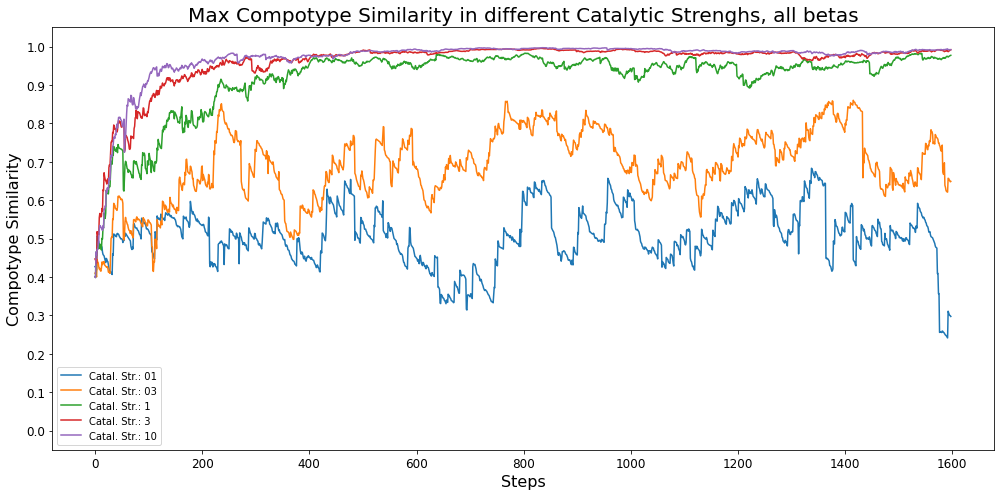

In [46]:
'''Compotype analysis final graph'''
'''Graph for all curves of a kind together.
Let's do a loop for all the calculations done for one graph and record the averages for each series.
This dictionary record we can plot by going over each appendage independently and coupling it to the appendages values.'''
the_big_coalescence_dict = {}
catalysis_list = [0.1,0.3,1,3,10]
positions_list = range(1,len(catalysis_list)+1)


all_data_analyses_dict = {}
for catal in ['01','03',1,3,10]:
    data_analysis_dict = {}
    for beta in range(len(list(eval('data_catal_' + str(catal))['beta_matrices_seeds'][0]))):
        for init_cond in range(eval('df_all_H_compotype_catal_' + str(catal) + '_beta_' + str(beta) + '_global').shape[0]):
            trajectory = list(eval('df_all_H_compotype_catal_' + str(catal) + '_beta_' + str(beta) + '_global').iloc[init_cond,:])
            for step_idx, step in enumerate(trajectory):
                if str(step) == 'nan':
                    break
                if step_idx not in data_analysis_dict:
                    data_analysis_dict[step_idx] = []
                data_analysis_dict[step_idx].append(step)
    typical_trajectory = []
    base_length = 0
    cutoff_length = 'Not Yet'
    for step_idx in data_analysis_dict:
#         print(len(data_analysis_dict[step_idx]))
        if len(data_analysis_dict[step_idx]) >= base_length:
            base_length = len(data_analysis_dict[step_idx])
        else:
            if cutoff_length == 'Not Yet' or step_idx < cutoff_length:
                cutoff_length = step_idx
        max_val = max(data_analysis_dict[step_idx])
        typical_trajectory.append(max_val)
    all_data_analyses_dict[catal] = typical_trajectory
    
    
new_base_length = 'Not Yet'
for catal in all_data_analyses_dict:
    length = len(all_data_analyses_dict[catal])
    if new_base_length == 'Not Yet' or length < new_base_length:
        new_base_length = length


fig, ax = plt.subplots(figsize=(14, 7))
for catal in all_data_analyses_dict:
    plt.plot(range(new_base_length), all_data_analyses_dict[catal][:new_base_length], label='Catal. Str.: ' + str(catal))
plt.legend()
plt.title('Max Compotype Similarity in different Catalytic Strenghs, all betas', fontsize=20)
plt.xlabel('Steps', fontsize=16)
plt.ylabel('Compotype Similarity', fontsize=16)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.tick_params(labelsize=12)
plt.ylim(-0.05,1.05)
plt.tight_layout()

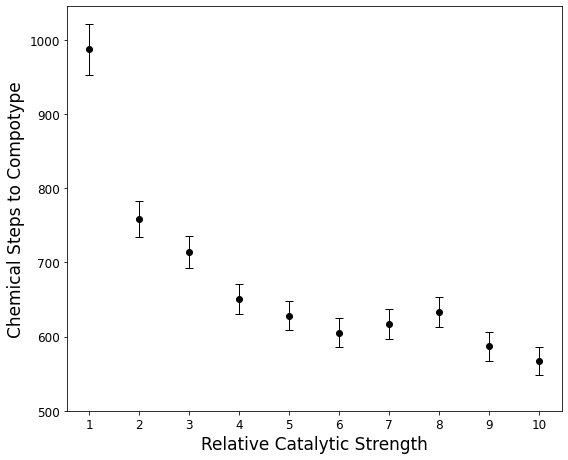

In [88]:
'''Arrival time for compotype as a measure for attractor at different catalytic appendages'''
real_positions = True
log_xscale = False
arrival_time_catal_dict = {}
for catal in range(1,11):
    arrival_time_catal_dict[catal] = []
    for beta in range(len(list(eval('data_catal_' + str(catal))['beta_matrices_seeds'][0]))):
        for init_cond in range(eval('df_all_H_compotype_catal_' + str(catal) + '_beta_' + str(beta) + '_global').shape[0]):
            trajectory = list(eval('df_all_H_compotype_catal_' + str(catal) + '_beta_' + str(beta) + '_global').iloc[init_cond,:])
            for step_idx, step in enumerate(trajectory):
                if str(step) == 'nan':
                    break
                if step >= 0.9:
                    arrival_time_catal_dict[catal].append(step_idx)
                    break

fig, ax = plt.subplots(figsize=(8, 6.5))
labels = []
positions = []
pos = 1
for catal in arrival_time_catal_dict:
    if not arrival_time_catal_dict[catal]:
        continue
    mean_arrival_time = np.mean(arrival_time_catal_dict[catal])
    sem_arrival_time = stats.sem(arrival_time_catal_dict[catal])
    labels.append(catal)
    if real_positions:
        plt.errorbar(catal, mean_arrival_time, yerr = sem_arrival_time, capsize = 4, #ecolor = colors_dict[lipid],
                     linewidth=1, label='Catal. Str.: ' + str(catal), color = 'k',
                     fmt='o', capthick=1)
    else:
        plt.errorbar(pos, mean_arrival_time, yerr = sem_arrival_time, capsize = 4, #ecolor = colors_dict[lipid],
                     linewidth=1, label='Catal. Str.: ' + str(catal), color = 'k',
                     fmt='o', capthick=1)
    positions.append(pos)
    pos += 1
# ax.legend(bbox_to_anchor=(1.02, 1.0), loc='upper left', fontsize=12)
# plt.title('Arrival Time to Compotype Dependency on Catalytic Strength, all betas', fontsize=20)
plt.xlabel('Relative Catalytic Strength', fontsize=17)
plt.ylabel('Chemical Steps to Compotype', fontsize=17)
# plt.legend()
plt.tick_params(labelsize=12)
if log_xscale:
    ax.set_xscale('log')
plt.xticks(positions,labels=labels)
# plt.ylim(bottom=-10)
plt.ylim(bottom=500)
plt.tight_layout()
plt.savefig("Relative Catalytic Strength.pdf")

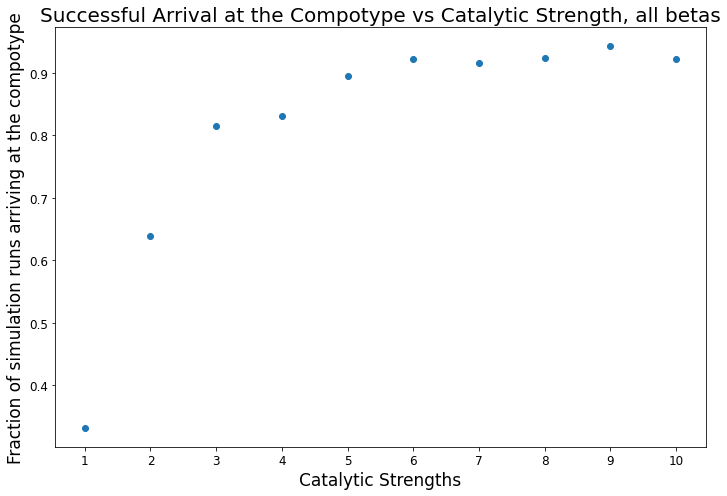

In [61]:
'''Arrival time for compotype as a measure for attractor at different catalytic appendages'''
finishers_catal_dict = {}
for catal in range(1,11):
    finishers_catal_dict[catal] = []
    for beta in range(len(list(eval('data_catal_' + str(catal))['beta_matrices_seeds'][0]))):
        for init_cond in range(eval('df_all_H_compotype_catal_' + str(catal) + '_beta_' + str(beta) + '_global').shape[0]):
            trajectory = list(eval('df_all_H_compotype_catal_' + str(catal) + '_beta_' + str(beta) + '_global').iloc[init_cond,:])
            for step_idx, step in enumerate(trajectory):
                if str(step) == 'nan':
                    break
                if step >= 0.9:
                    finishers_catal_dict[catal].append(1)
                    break

fig, ax = plt.subplots(figsize=(10, 7))
labels = []
positions = []
pos = 1
for catal in finishers_catal_dict:
    if not finishers_catal_dict[catal]:
        continue
    finishers = sum(finishers_catal_dict[catal])/500
    plt.scatter(pos, finishers, label='Catal. Str.: ' + str(catal), color='tab:blue')
    labels.append(catal)
    positions.append(pos)
    pos += 1
# ax.legend(bbox_to_anchor=(1.02, 1.0), loc='upper left', fontsize=12)
plt.title('Successful Arrival at the Compotype vs Catalytic Strength, all betas', fontsize=20)
plt.xlabel('Catalytic Strengths', fontsize=17)
plt.ylabel('Fraction of simulation runs arriving at the compotype', fontsize=17)
# plt.legend()
plt.xticks(positions,labels=labels)
plt.tick_params(labelsize=12)
plt.tight_layout()